In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import random

random.seed(12345)

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Quantitative summary of data

In [149]:
import pandas as pd

df = pd.read_csv("/content/drive/Shareddrives/TTP Project/mxmh_survey_results.csv")

pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.max_columns', None)   # Show all columns

columns_to_drop = ['Timestamp', 'Permissions']
df = df.drop(columns = columns_to_drop)

# Summary of numerical variables
numerical_summary = df.describe().T
numerical_summary['missing_values'] = df.isnull().sum()
numerical_summary['mode'] = df.mode().iloc[0]

# Function to summarize categorical variables
def summarize_categorical(df):
    summary_list = []

    categorical_vars = df.select_dtypes(include=['object', 'category'])
    for col in categorical_vars.columns:
        unique_categories = df[col].unique()
        num_unique_categories = len(unique_categories)
        most_frequent_category = df[col].mode()[0]
        most_frequent_count = df[col].value_counts().iloc[0]

        summary_list.append({
            'Column': col,
            'Num Unique Categories': num_unique_categories,
            'Most Frequent Category': most_frequent_category,
            'Count of Most Frequent': most_frequent_count
        })

    summary_df = pd.DataFrame(summary_list)
    return summary_df

# Summarize categorical columns
categorical_summary = summarize_categorical(df)

# Output the summaries
print("Numerical Summary:")
print(numerical_summary)

print("\nCategorical Summary:")
print(categorical_summary)

Numerical Summary:
               count          mean           std   min    25%    50%    75%  \
Age            735.0  2.520680e+01  1.205497e+01  10.0   18.0   21.0   28.0   
Hours per day  736.0  3.572758e+00  3.028199e+00   0.0    2.0    3.0    5.0   
BPM            629.0  1.589948e+06  3.987261e+07   0.0  100.0  120.0  144.0   
Anxiety        736.0  5.837636e+00  2.793054e+00   0.0    4.0    6.0    8.0   
Depression     736.0  4.796196e+00  3.028870e+00   0.0    2.0    5.0    7.0   
Insomnia       736.0  3.738451e+00  3.088689e+00   0.0    1.0    3.0    6.0   
OCD            736.0  2.637228e+00  2.842017e+00   0.0    0.0    2.0    5.0   

                       max  missing_values   mode  
Age                   89.0               1   18.0  
Hours per day         24.0               0    2.0  
BPM            999999999.0             107  120.0  
Anxiety               10.0               0    7.0  
Depression            10.0               0    7.0  
Insomnia              10.0          

In [150]:
data = pd.read_csv("/content/drive/Shareddrives/TTP Project/mt_data_cleaned_binary.csv")

In [151]:
data.head(5)

,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,BPM,Frequency_Classical,Frequency_Country,Frequency_EDM,Frequency_Folk,Frequency_Gospel,Frequency_Hip_hop,Frequency_Jazz,Frequency_K_pop,Frequency_Latin,Frequency_Lofi,Frequency_Metal,Frequency_Pop,Frequency_R_B,Frequency_Rap,Frequency_Rock,Frequency_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects,Music_effects_Improve
0,18,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,0
1,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,1
2,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,1
3,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,1
4,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,1


In [152]:
data.shape

(716, 32)

In [153]:
data.columns

Index(['Age', 'Primary_streaming_service', 'Hours_per_day', 'While_working',
       'Instrumentalist', 'Composer', 'Fav_genre', 'Exploratory',
       'Foreign_languages', 'BPM', 'Frequency_Classical', 'Frequency_Country',
       'Frequency_EDM', 'Frequency_Folk', 'Frequency_Gospel',
       'Frequency_Hip_hop', 'Frequency_Jazz', 'Frequency_K_pop',
       'Frequency_Latin', 'Frequency_Lofi', 'Frequency_Metal', 'Frequency_Pop',
       'Frequency_R_B', 'Frequency_Rap', 'Frequency_Rock',
       'Frequency_Video_game_music', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Music_effects', 'Music_effects_Improve'],
      dtype='object')

In [154]:
# Dropping the Permissions column and Timestamp column
# data = data.drop(['Timestamp', 'Permissions'], axis=1)
# data.columns

In [155]:
data.describe()

,Age,Hours_per_day,BPM,Anxiety,Depression,Insomnia,OCD,Music_effects_Improve
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,25.202514,3.572696,122.786004,5.842877,4.798883,3.715782,2.632682,0.745810
std,11.960754,3.019240,31.904578,2.786725,3.020799,3.082868,2.847866,0.435709
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,103.810055,4.000000,2.000000,1.000000,0.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000,1.000000
75%,28.000000,5.000000,140.000000,8.000000,7.000000,6.000000,4.250000,1.000000
max,89.000000,24.000000,220.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [156]:
# Checking for missing entries
data.isnull().sum()

Age                           0
Primary_streaming_service     0
Hours_per_day                 0
While_working                 0
Instrumentalist               0
Composer                      0
Fav_genre                     0
Exploratory                   0
Foreign_languages             0
BPM                           0
Frequency_Classical           0
Frequency_Country             0
Frequency_EDM                 0
Frequency_Folk                0
Frequency_Gospel              0
Frequency_Hip_hop             0
Frequency_Jazz                0
Frequency_K_pop               0
Frequency_Latin               0
Frequency_Lofi                0
Frequency_Metal               0
Frequency_Pop                 0
Frequency_R_B                 0
Frequency_Rap                 0
Frequency_Rock                0
Frequency_Video_game_music    0
Anxiety                       0
Depression                    0
Insomnia                      0
OCD                           0
Music_effects                 0
Music_ef

In [157]:
# Plotting the missing values using a heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
# plt.title('Missing Values Heatmap')
# plt.show()

In [158]:
# Fill missing bpm values with the median bpm of their respective fav_genre group
# data['BPM'] = data.groupby('Fav genre')['BPM'].transform(lambda x: x.fillna(x.median()))

In [159]:
# Plotting the missing values using a heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
# plt.title('Missing Values Heatmap')
# plt.show()

In [160]:
# Plotting the missing values using a heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
# plt.title('Missing Values Heatmap')
# plt.show()

In [161]:
# Correlation between features
# corr = data.corr()
# sns.heatmap(corr)

# Checking for outliers

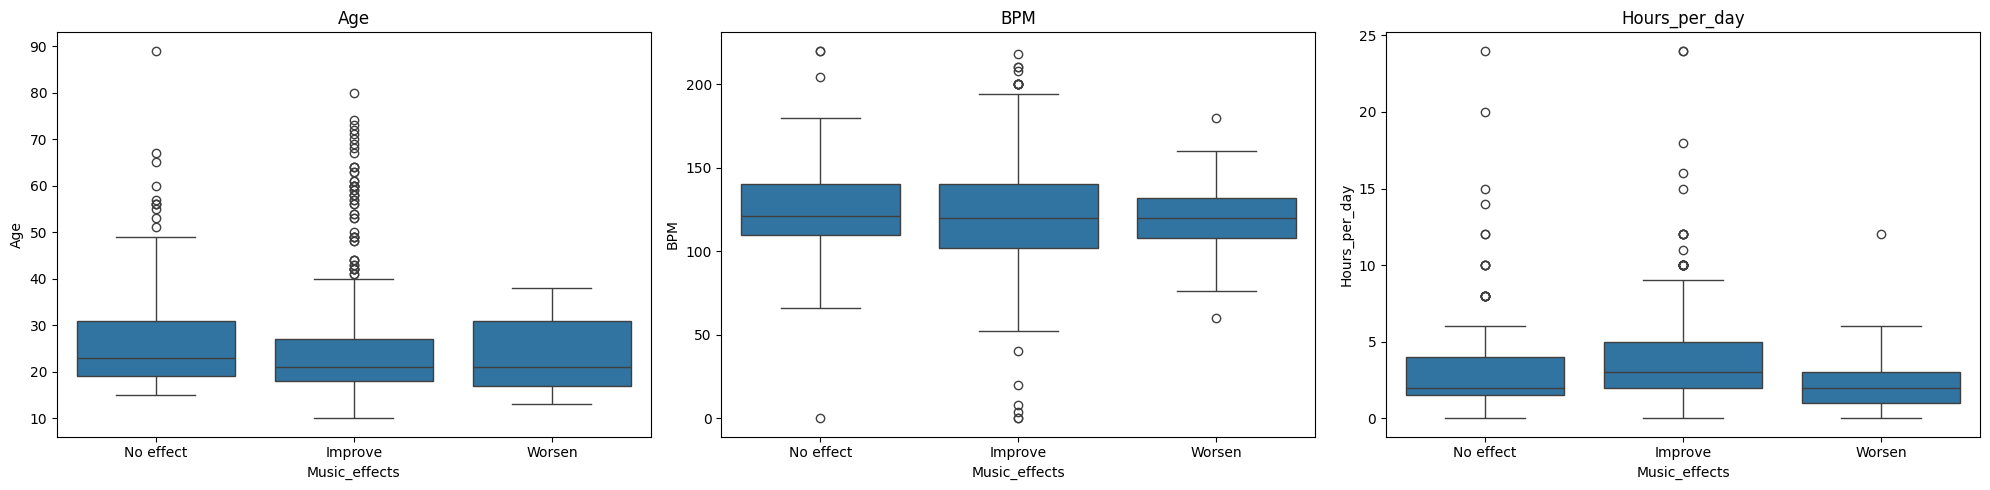

In [162]:
selected_boxplot_columns = ['Age', 'BPM', 'Hours_per_day', 'Music_effects']
data_boxplot = data[selected_boxplot_columns]

# Plotting boxplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

for i, column in enumerate(data_boxplot.columns):
    if column != 'Music_effects':
        sns.boxplot(x='Music_effects', y=column, data=data_boxplot, ax=axs[i])
        axs[i].set_title(column)

plt.tight_layout()
plt.show()

BPM column has an outlier.

In [163]:
# drop outliers in BPM, we suspect that's a typo

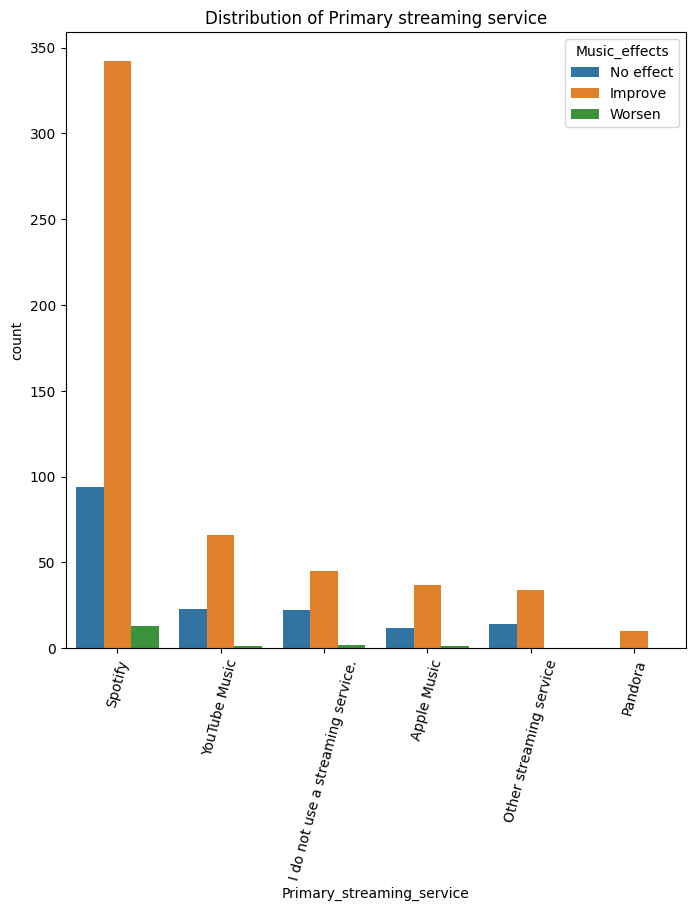

In [164]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Primary_streaming_service", data=data, hue="Music_effects")
plt.title("Distribution of Primary streaming service")
plt.xticks(rotation=75)
plt.show()

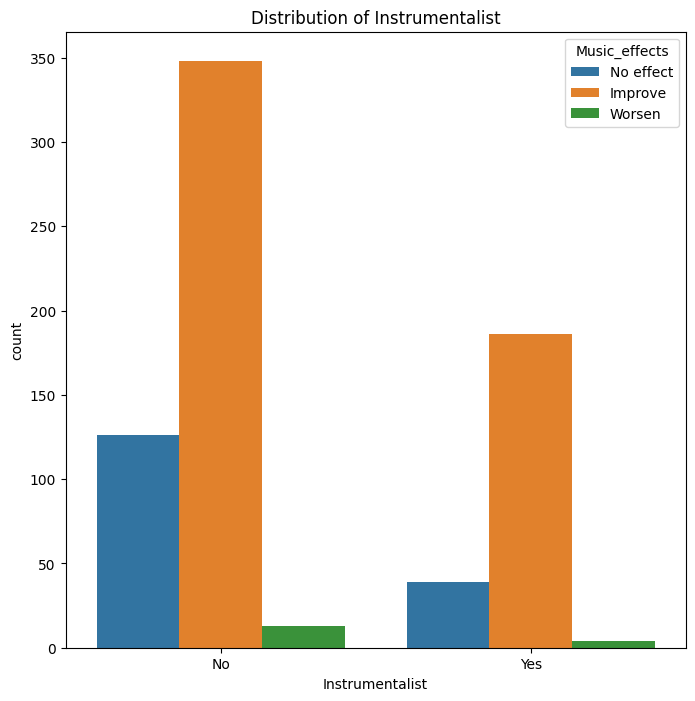

In [165]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Instrumentalist", data=data, hue="Music_effects")
plt.title("Distribution of Instrumentalist")
plt.show()

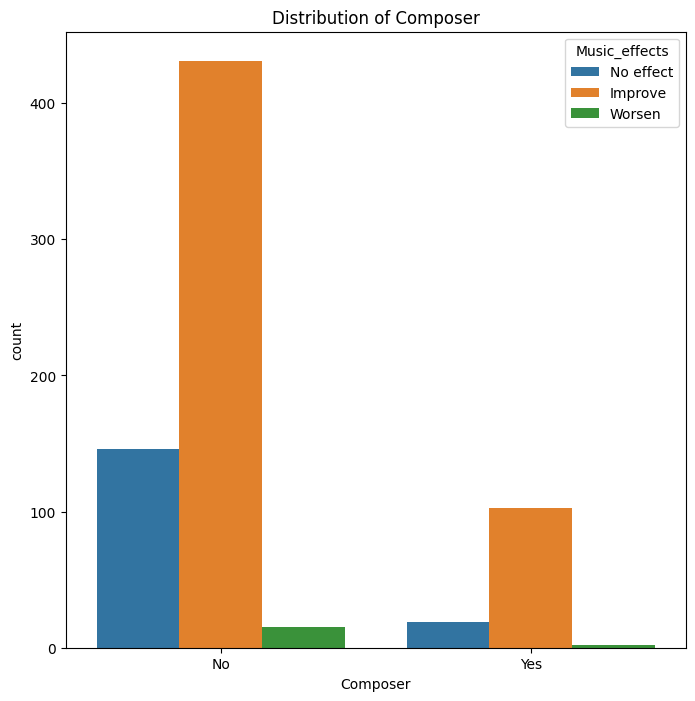

In [166]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Composer", data=data, hue="Music_effects")
plt.title("Distribution of Composer")
plt.show()

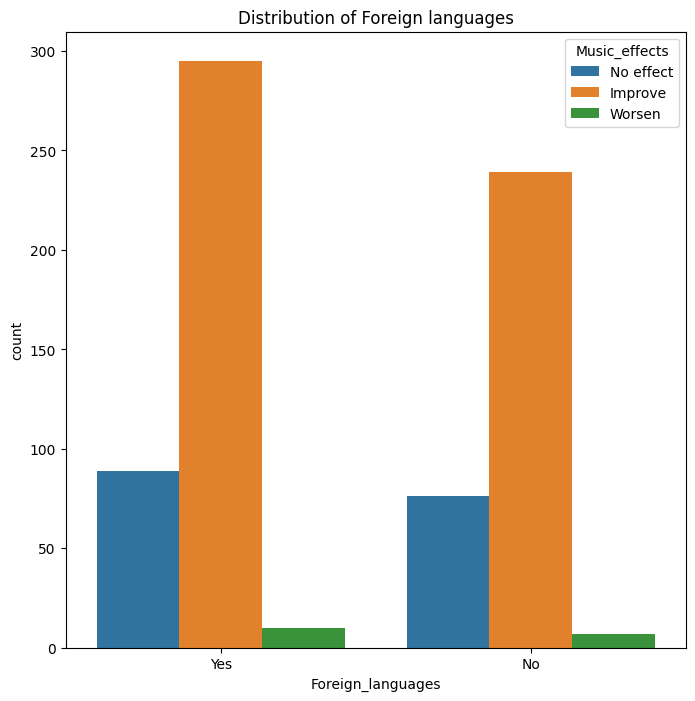

In [167]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Foreign_languages", data=data, hue="Music_effects")
plt.title("Distribution of Foreign languages")
plt.show()

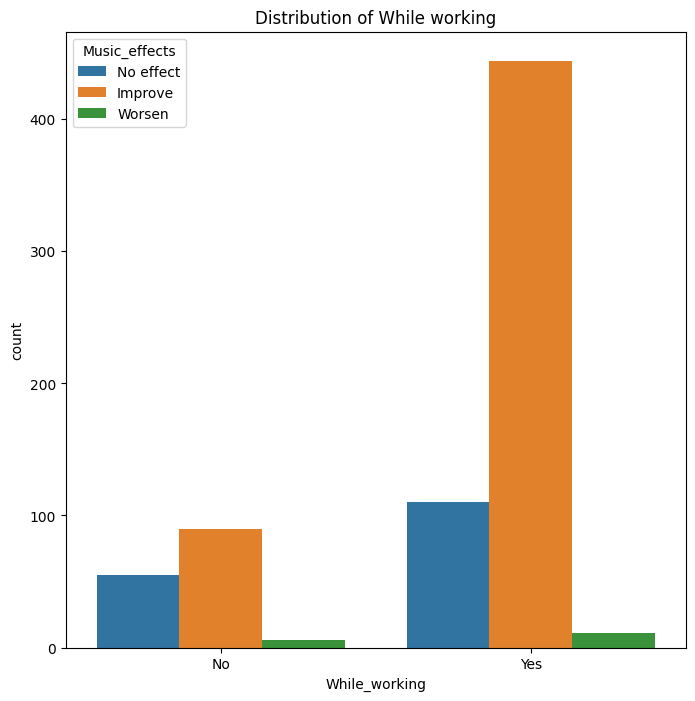

In [168]:
plt.figure(figsize=(8, 8))
sns.countplot(x="While_working", data=data, hue="Music_effects")
plt.title("Distribution of While working")
plt.show()

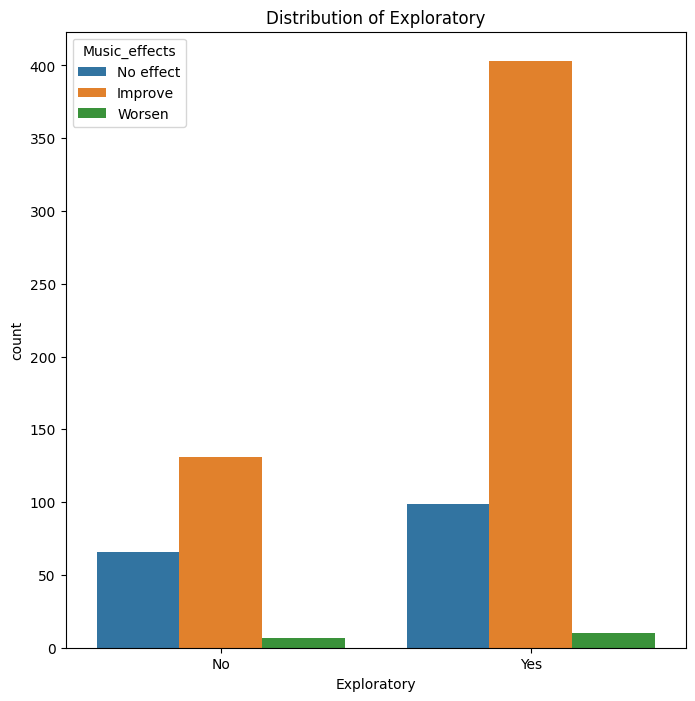

In [169]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Exploratory", data=data, hue="Music_effects")
plt.title("Distribution of Exploratory")
plt.show()

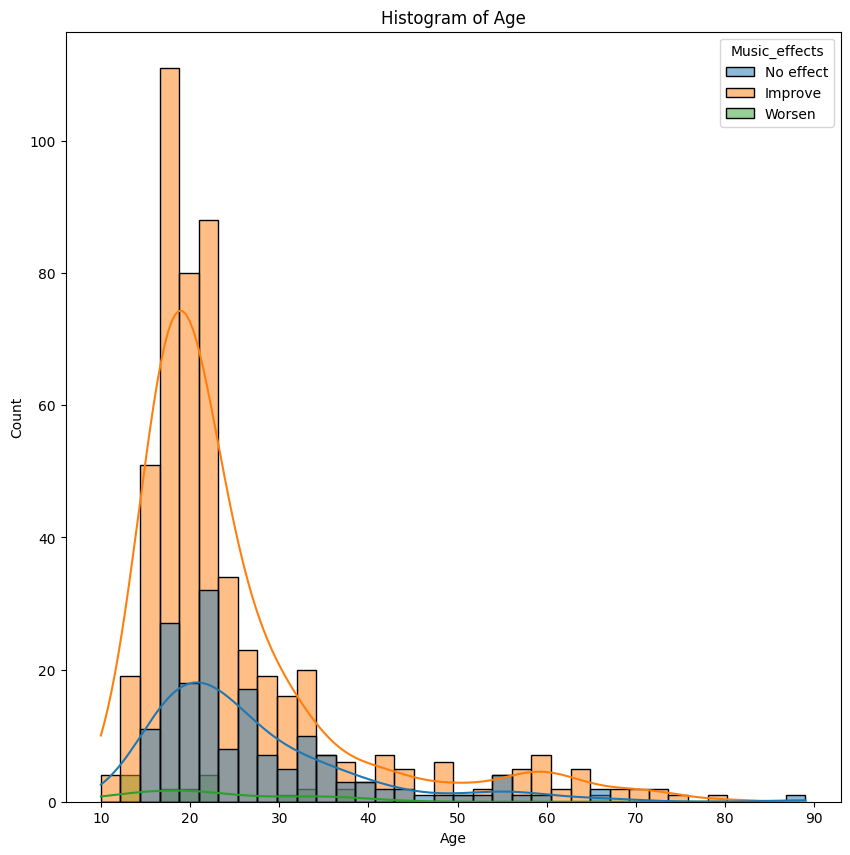

In [170]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Age', hue='Music_effects', kde=True)
plt.title(f'Histogram of Age')
plt.show()

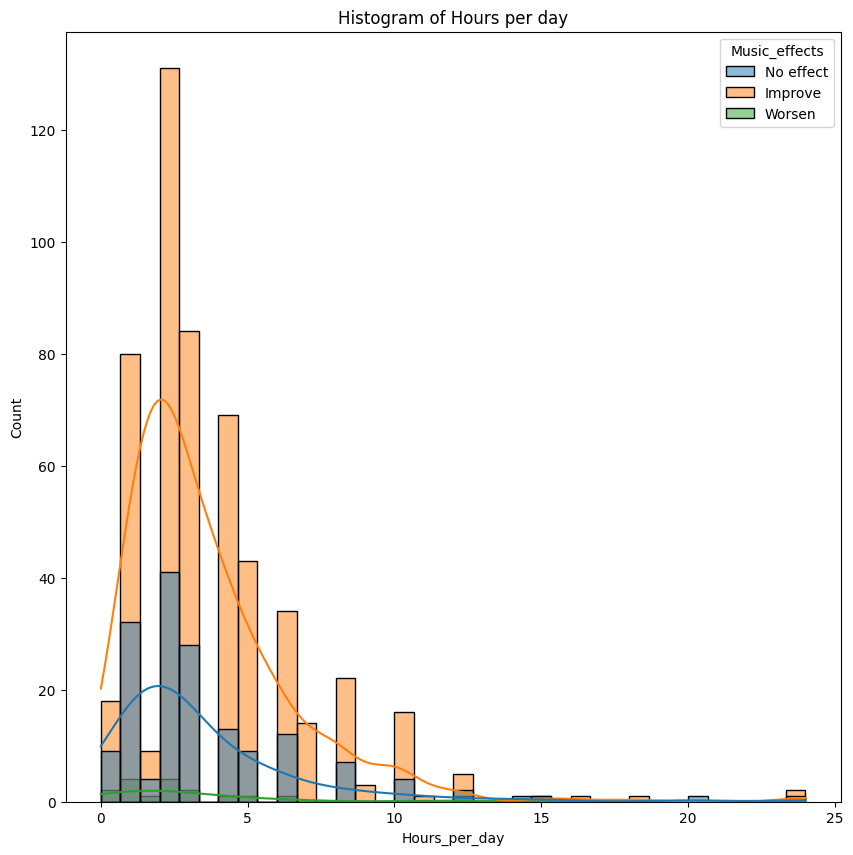

In [171]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Hours_per_day', hue='Music_effects', kde=True)
plt.title(f'Histogram of Hours per day')
plt.show()

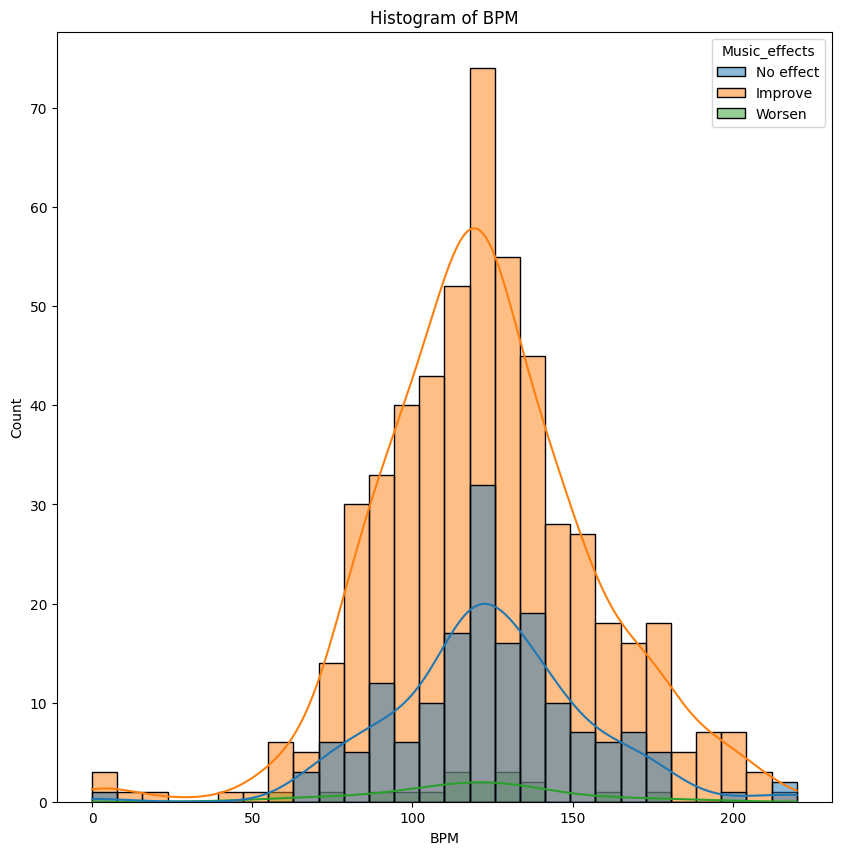

In [172]:
# Run the below code after addressing the outlier in the BPM column

plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='BPM', hue='Music_effects', kde=True)
plt.title(f'Histogram of BPM')
plt.show()

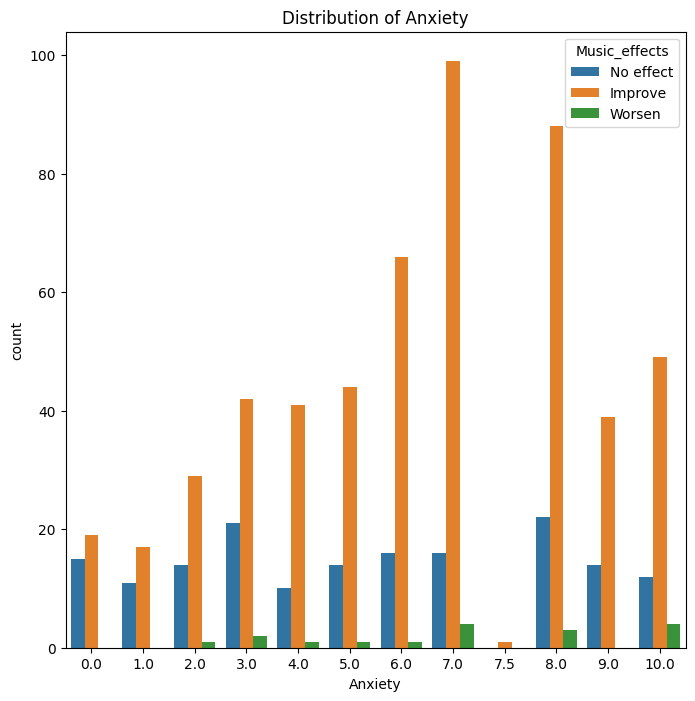

In [173]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Anxiety", data=data, hue="Music_effects")
plt.title("Distribution of Anxiety")
plt.show()

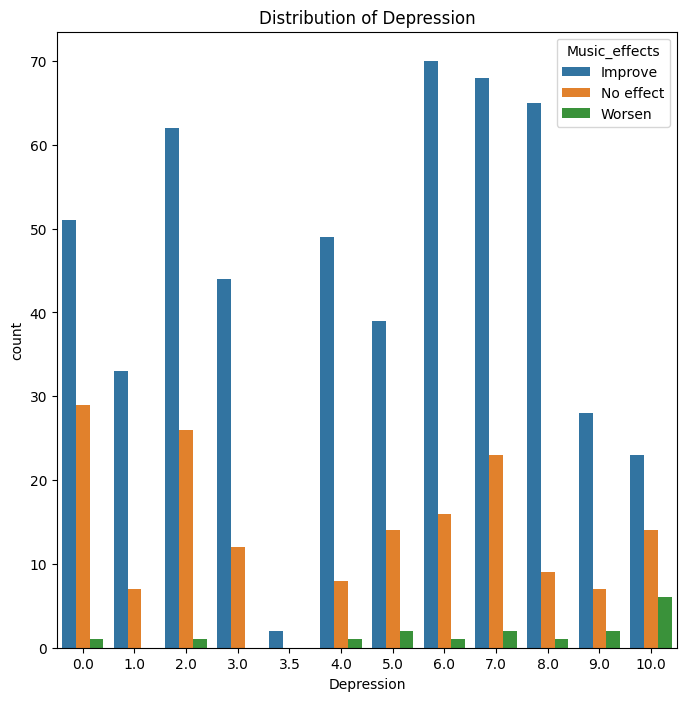

In [174]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Depression", data=data, hue="Music_effects")
plt.title("Distribution of Depression")
plt.show()

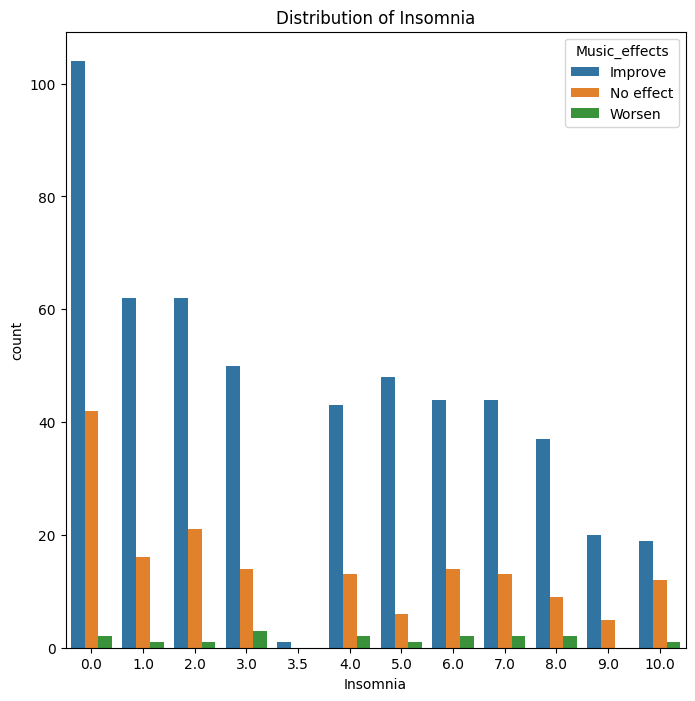

In [175]:
plt.figure(figsize=(8, 8))
sns.countplot(x="Insomnia", data=data, hue="Music_effects")
plt.title("Distribution of Insomnia")
plt.show()

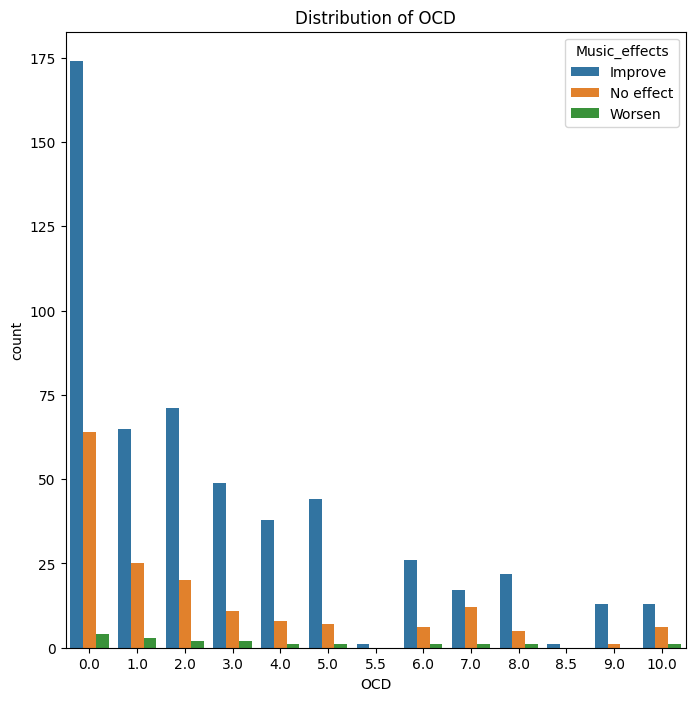

In [176]:
plt.figure(figsize=(8, 8))
sns.countplot(x="OCD", data=data, hue="Music_effects")
plt.title("Distribution of OCD")
plt.show()

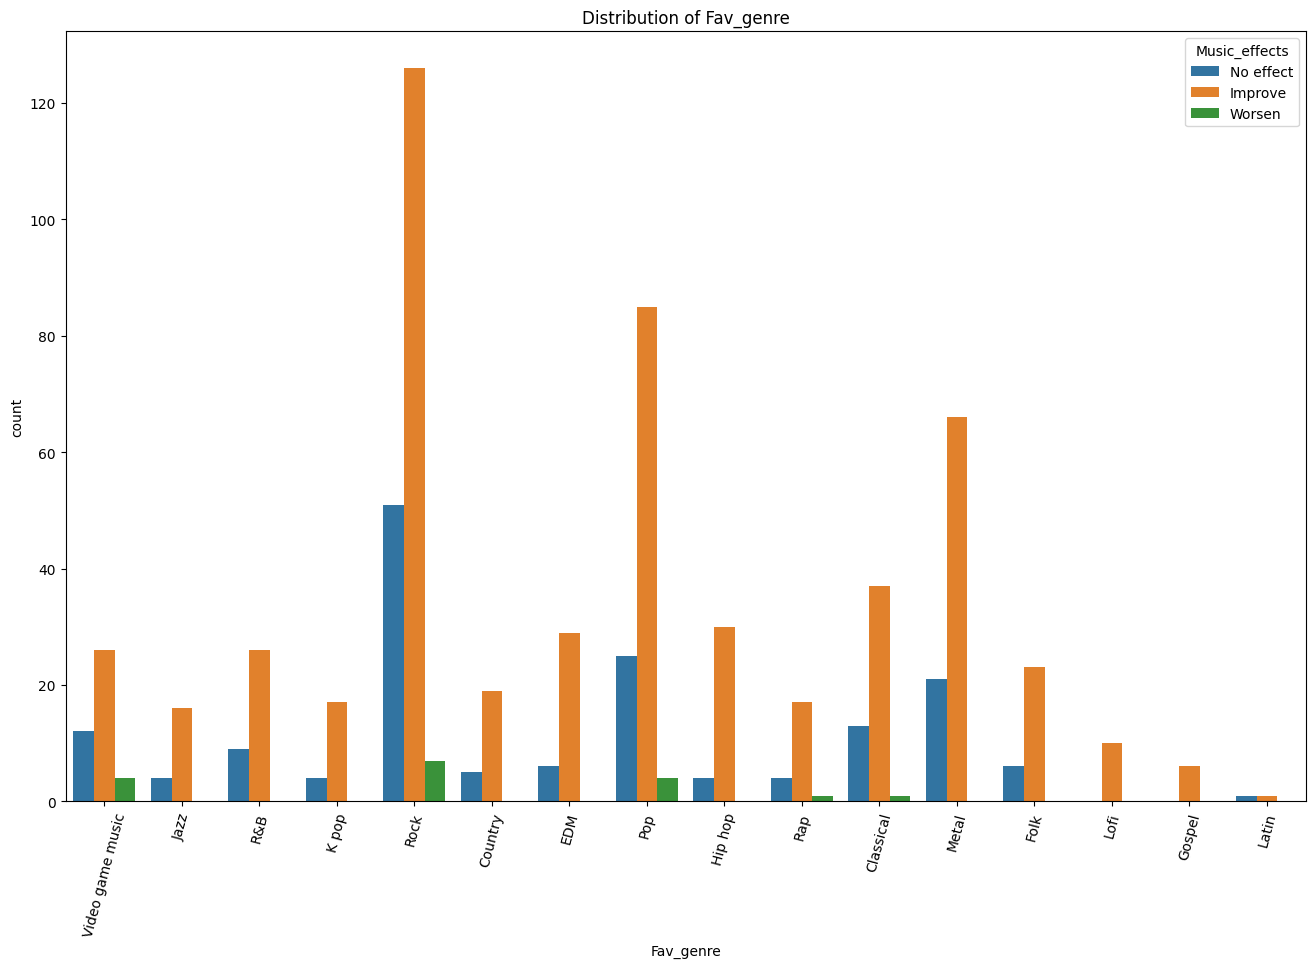

In [177]:
plt.figure(figsize=(16, 10))
sns.countplot(x="Fav_genre", data=data, hue="Music_effects")
plt.title("Distribution of Fav_genre")
plt.xticks(rotation=75)
plt.show()

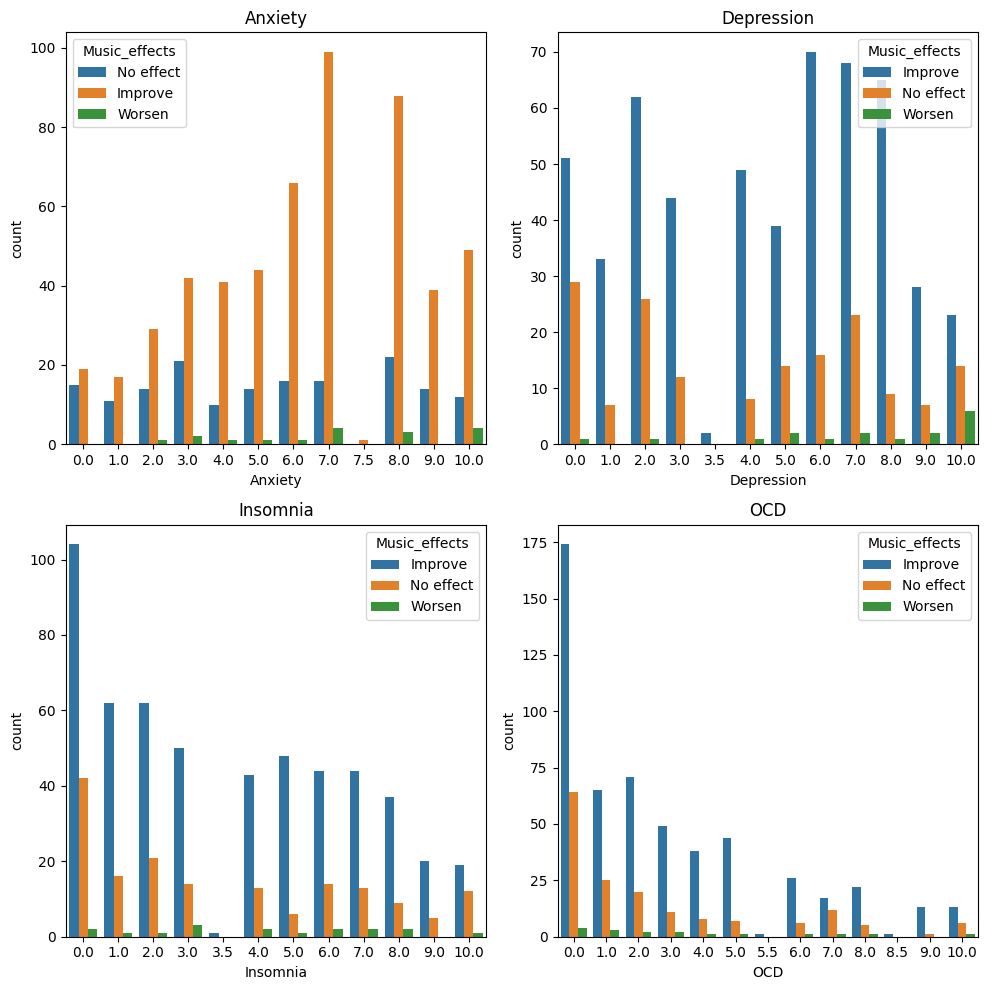

In [178]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

columns_for_plotting = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

for i, column in enumerate(columns_for_plotting):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=column, hue='Music_effects', data=data, ax=ax)
    ax.set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

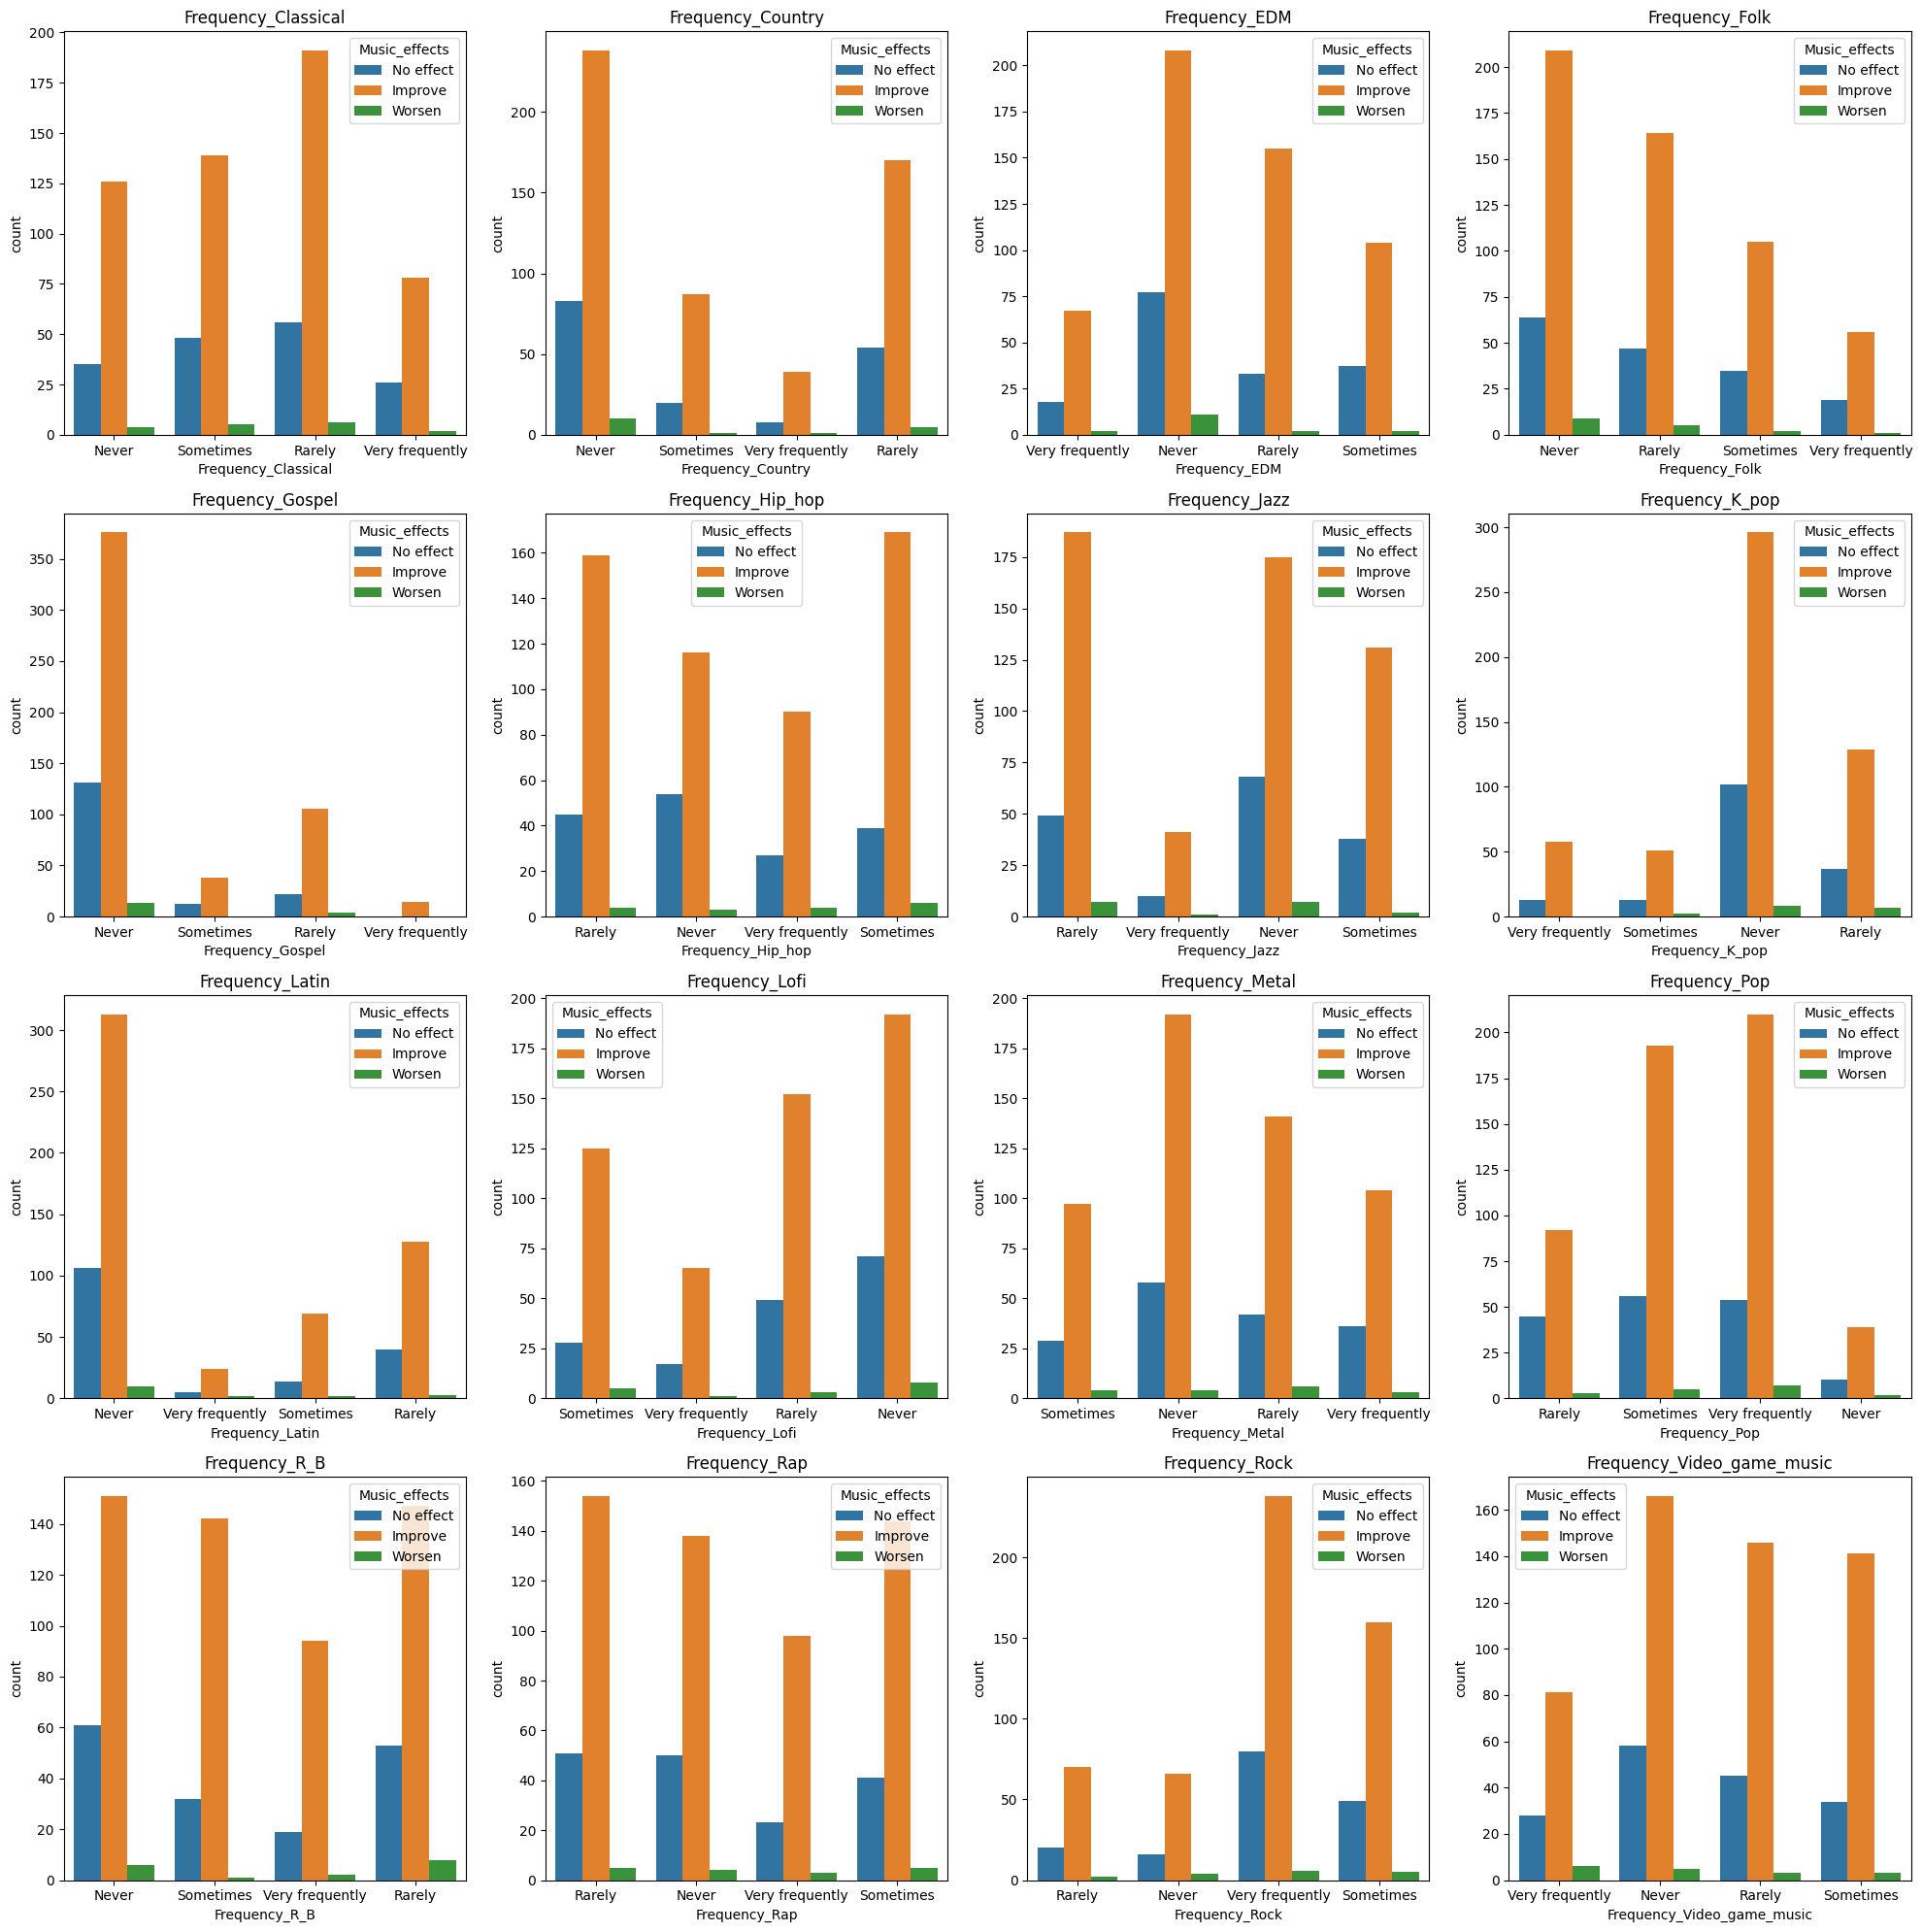

In [179]:
# Plotting
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

columns_for_plotting = ['Frequency_Classical', 'Frequency_Country',
       'Frequency_EDM', 'Frequency_Folk', 'Frequency_Gospel',
       'Frequency_Hip_hop', 'Frequency_Jazz', 'Frequency_K_pop',
       'Frequency_Latin', 'Frequency_Lofi', 'Frequency_Metal', 'Frequency_Pop',
       'Frequency_R_B', 'Frequency_Rap', 'Frequency_Rock',
       'Frequency_Video_game_music']

for i, column in enumerate(columns_for_plotting):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.countplot(x=column, hue='Music_effects', data=data, ax=ax)
    ax.set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [180]:
import re
from dateutil import parser

import numpy as np
import pandas as pd
import altair as alt
import missingno as msn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Adding a new binary column Music_effect_Improve

In [181]:
# # For adding a new binary column

# # Instance of the One-Hot Encoder object
# oneHotEncoder = OneHotEncoder(dtype=int)

# # Train the One-Hot Encoder object with the values of the column 'Music effects'
# musicEffectsOneHot = oneHotEncoder.fit_transform(data[["Music_effects"]])

# # Turn the One-Hot Encoded sparse matrix into a pandas dataframe
# dfMusicEffectsOneHot = pd.DataFrame(musicEffectsOneHot.toarray(), columns=oneHotEncoder.get_feature_names_out(["Music_effects"]))

# # Concatenate the general dataset with the One-Hot Encoded dataset columns
# data = pd.concat([data, dfMusicEffectsOneHot], axis=1)

In [182]:
# data.columns

In [183]:
# data_dropped = data.drop(columns=['Music_effects_No effect', 'Music_effects_Worsen'])

In [184]:
# Write the modified DataFrame to a CSV file
# data_dropped.to_csv('mt_data_cleaned_binary.csv', index=False)

# Classification

Logistic Regression

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         716 non-null    int64  
 1   Primary_streaming_service   716 non-null    object 
 2   Hours_per_day               716 non-null    float64
 3   While_working               716 non-null    object 
 4   Instrumentalist             716 non-null    object 
 5   Composer                    716 non-null    object 
 6   Fav_genre                   716 non-null    object 
 7   Exploratory                 716 non-null    object 
 8   Foreign_languages           716 non-null    object 
 9   BPM                         716 non-null    float64
 10  Frequency_Classical         716 non-null    object 
 11  Frequency_Country           716 non-null    object 
 12  Frequency_EDM               716 non-null    object 
 13  Frequency_Folk              716 non

In [186]:
# # Convert categorical columns to one-hot encoding
# categorical_columns = [
#     'Primary_streaming_service', 'While_working', 'Instrumentalist',
#     'Composer', 'Fav_genre', 'Exploratory', 'Foreign_languages',
#     'Frequency_Classical', 'Frequency_Country', 'Frequency_EDM',
#     'Frequency_Folk', 'Frequency_Gospel', 'Frequency_Hip_hop',
#     'Frequency_Jazz', 'Frequency_K_pop', 'Frequency_Latin',
#     'Frequency_Lofi', 'Frequency_Metal', 'Frequency_Pop', 'Frequency_R_B',
#     'Frequency_Rap', 'Frequency_Rock', 'Frequency_Video_game_music'
# ]

# # Perform one-hot encoding
# data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [187]:
# Columns to convert True/False to 1/0
columns_to_convert = ['While_working', 'Instrumentalist',
    'Composer', 'Exploratory', 'Foreign_languages']

# Replace 'Yes' with True and 'No' with False
data[columns_to_convert] = data[columns_to_convert].replace({'Yes': True, 'No': False})

# Convert True/False to 1/0 for specified columns
data[columns_to_convert] = data[columns_to_convert].astype(int)

In [188]:
# Convert nominal categorical columns to one-hot encoding
one_hot_categorical_columns = [
    'Primary_streaming_service', 'Fav_genre'
]

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=one_hot_categorical_columns)

In [189]:
# Perform label encoding for Ordinal variables
label_encoders = {}
label_categorical_columns = [
    'Frequency_Classical', 'Frequency_Country', 'Frequency_EDM',
    'Frequency_Folk', 'Frequency_Gospel', 'Frequency_Hip_hop',
    'Frequency_Jazz', 'Frequency_K_pop', 'Frequency_Latin',
    'Frequency_Lofi', 'Frequency_Metal', 'Frequency_Pop', 'Frequency_R_B',
    'Frequency_Rap', 'Frequency_Rock', 'Frequency_Video_game_music'
]

# Perform label encoding
for column in label_categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_encoded[column] = label_encoders[column].fit_transform(data_encoded[column])

In [190]:
# Display the resulting DataFrame
print(data_encoded.head())

   Age  Hours_per_day  While_working  Instrumentalist  Composer  Exploratory  \
0   18            4.0              0                0         0            0   
1   61            2.5              1                0         1            1   
2   18            4.0              1                0         0            1   
3   18            5.0              1                1         1            1   
4   18            3.0              1                1         0            1   

   Foreign_languages    BPM  Frequency_Classical  Frequency_Country  \
0                  1  132.0                    0                  0   
1                  1   84.0                    2                  0   
2                  0  107.0                    0                  0   
3                  1   86.0                    1                  2   
4                  1   66.0                    2                  0   

   Frequency_EDM  Frequency_Folk  Frequency_Gospel  Frequency_Hip_hop  \
0              3   

In [191]:
# Display all the columns
print(data_encoded.columns)

Index(['Age', 'Hours_per_day', 'While_working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign_languages', 'BPM', 'Frequency_Classical',
       'Frequency_Country', 'Frequency_EDM', 'Frequency_Folk',
       'Frequency_Gospel', 'Frequency_Hip_hop', 'Frequency_Jazz',
       'Frequency_K_pop', 'Frequency_Latin', 'Frequency_Lofi',
       'Frequency_Metal', 'Frequency_Pop', 'Frequency_R_B', 'Frequency_Rap',
       'Frequency_Rock', 'Frequency_Video_game_music', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Music_effects', 'Music_effects_Improve',
       'Primary_streaming_service_Apple Music',
       'Primary_streaming_service_I do not use a streaming service.',
       'Primary_streaming_service_Other streaming service',
       'Primary_streaming_service_Pandora',
       'Primary_streaming_service_Spotify',
       'Primary_streaming_service_YouTube Music', 'Fav_genre_Classical',
       'Fav_genre_Country', 'Fav_genre_EDM', 'Fav_genre_Folk',
       'Fav_genre_Gospel', 'F

In [192]:
# Drop the 'Music_effects' column
data_encoded.drop(columns=['Music_effects'], inplace=True)

In [193]:
data_encoded.to_csv('mt_data_feature_selection.csv', index=False)

In [194]:
# Define features and target
X = data_encoded.drop(columns=['Music_effects_Improve'])
y = data_encoded['Music_effects_Improve']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
selected_columns_forward_stepwise = ['While_working', 'Exploratory', 'Anxiety', 'Frequency_R_B']

X_train_sel = X_train[selected_columns_forward_stepwise].copy()
X_test_sel = X_test[selected_columns_forward_stepwise].copy()

# Standardize the features
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_sel)
X_test_selected = scaler.transform(X_test_sel)

In [196]:
selected_columns_reg = [
    'While_working', 'Instrumentalist', 'Composer', 'Exploratory',
    'Frequency_Country', 'Frequency_Gospel', 'Frequency_R_B',
    'Anxiety', 'Primary_streaming_service_Pandora', 'Fav_genre_Gospel',
    'Fav_genre_Hip hop', 'Fav_genre_Lofi', 'Fav_genre_Rock',
    'Fav_genre_Video game music'
]

X_train_sel_reg = X_train[selected_columns_reg].copy()
X_test_sel_reg = X_test[selected_columns_reg].copy()

# Standardize the features
scaler = StandardScaler()
X_train_selected_reg = scaler.fit_transform(X_train_sel_reg)
X_test_selected_reg = scaler.transform(X_test_sel_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logistic Regression:
Accuracy: 0.7152777777777778
              precision    recall  f1-score   support

           0       0.29      0.15      0.20        34
           1       0.77      0.89      0.83       110

    accuracy                           0.72       144
   macro avg       0.53      0.52      0.51       144
weighted avg       0.66      0.72      0.68       144



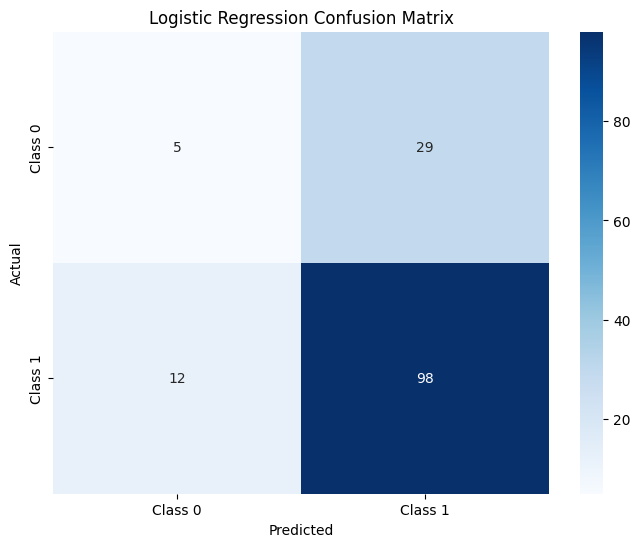

True Positive Rate (TPR): 0.8909
True Negative Rate (TNR): 0.1471
False Positive Rate (FPR): 0.8529
False Negative Rate (FNR): 0.1091


In [197]:
# Logistic Regression with no penalty
logit_model = LogisticRegression(penalty='none', solver='saga', max_iter=5000)
logit_model.fit(X_train_scaled, y_train)
y_pred_logit = logit_model.predict(X_test_scaled)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logit))
print(classification_report(y_test, y_pred_logit))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logit)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Logistic Regression:
Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.67      0.12      0.20        34
           1       0.78      0.98      0.87       110

    accuracy                           0.78       144
   macro avg       0.72      0.55      0.54       144
weighted avg       0.76      0.78      0.71       144



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


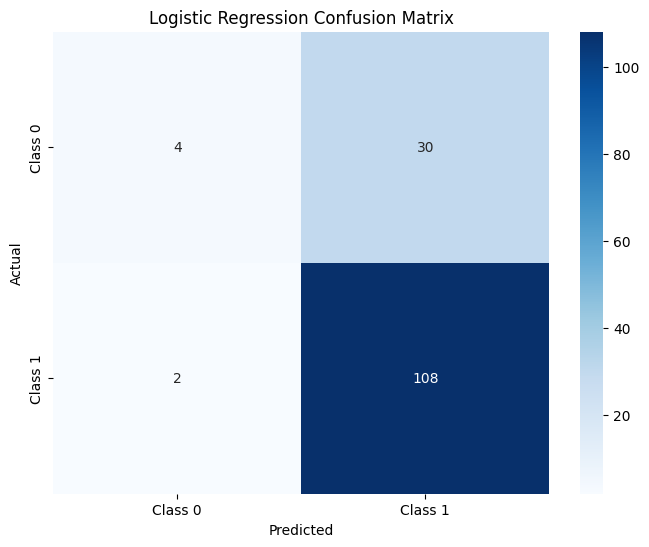

True Positive Rate (TPR): 0.9818
True Negative Rate (TNR): 0.1176
False Positive Rate (FPR): 0.8824
False Negative Rate (FNR): 0.0182


In [198]:
# Logistic Regression with no penalty
logit_model = LogisticRegression(penalty='none', solver='saga', max_iter=5000)
logit_model.fit(X_train_selected, y_train)
y_pred_logit = logit_model.predict(X_test_selected)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logit))
print(classification_report(y_test, y_pred_logit))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logit)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logistic Regression:
Accuracy: 0.7569444444444444
              precision    recall  f1-score   support

           0       0.46      0.18      0.26        34
           1       0.79      0.94      0.85       110

    accuracy                           0.76       144
   macro avg       0.62      0.56      0.56       144
weighted avg       0.71      0.76      0.71       144



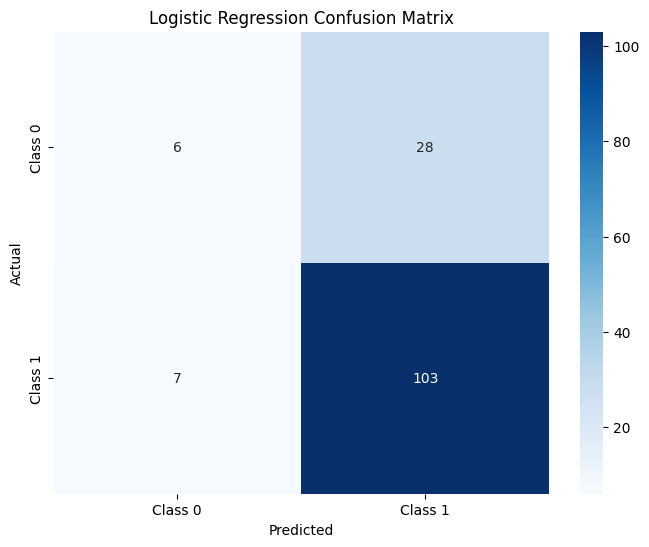

True Positive Rate (TPR): 0.9364
True Negative Rate (TNR): 0.1765
False Positive Rate (FPR): 0.8235
False Negative Rate (FNR): 0.0636


In [199]:
# Logistic Regression with no penalty
logit_model = LogisticRegression(penalty='none', solver='saga', max_iter=5000)
logit_model.fit(X_train_selected_reg, y_train)
y_pred_logit = logit_model.predict(X_test_selected_reg)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logit))
print(classification_report(y_test, y_pred_logit))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logit)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Lasso Regression:
Accuracy: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.21      0.09      0.12        34
           1       0.76      0.90      0.83       110

    accuracy                           0.71       144
   macro avg       0.49      0.49      0.48       144
weighted avg       0.63      0.71      0.66       144



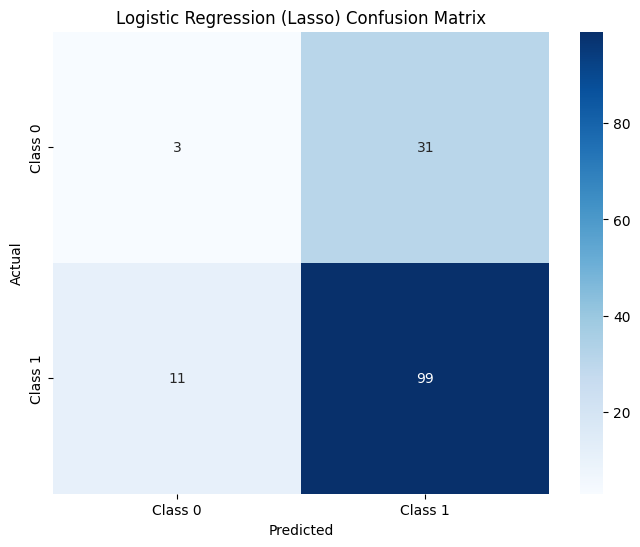

Ridge Regression:
Accuracy: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.25      0.12      0.16        34
           1       0.77      0.89      0.82       110

    accuracy                           0.71       144
   macro avg       0.51      0.50      0.49       144
weighted avg       0.64      0.71      0.67       144



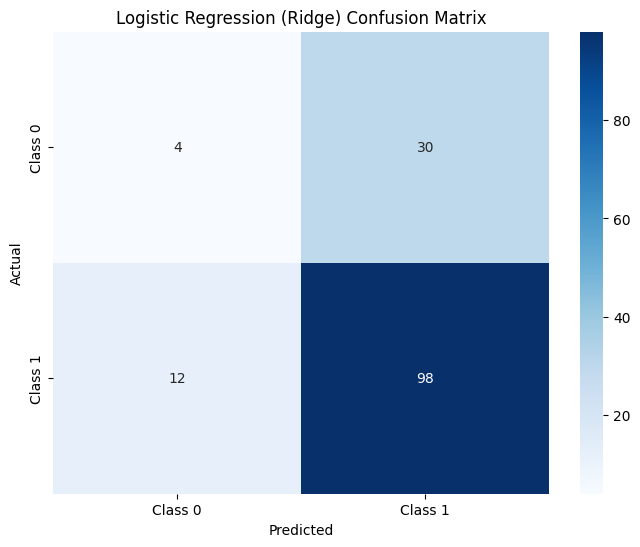

In [200]:
# Logistic Regression with L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
print("Lasso Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lasso)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression (Lasso) Confusion Matrix')
plt.show()

# Logistic Regression with L2 regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='saga', max_iter=5000)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print("Ridge Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ridge)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression (Ridge) Confusion Matrix')
plt.show()

In [201]:
# Print coefficients for Lasso regularization
lasso_coefficients = lasso_model.coef_
lasso_intercept = lasso_model.intercept_

print("Coefficients for Lasso Regularization:")
print("Intercept:", lasso_intercept)
for feature, coef in zip(X.columns, lasso_coefficients[0]):
    print(f"{feature}: {coef}")

Coefficients for Lasso Regularization:
Intercept: [1.26689122]
Age: 0.0
Hours_per_day: -0.07856136564670155
While_working: 0.35033067110005733
Instrumentalist: 0.2829045408470927
Composer: 0.16271904651811242
Exploratory: 0.19405246633124082
Foreign_languages: -0.08446842877927042
BPM: -0.010268387236805523
Frequency_Classical: -0.21455633571160482
Frequency_Country: 0.17028439388372332
Frequency_EDM: 0.0
Frequency_Folk: -0.05883752890848704
Frequency_Gospel: 0.02711304877665059
Frequency_Hip_hop: 0.0
Frequency_Jazz: 0.03653780517403386
Frequency_K_pop: 0.015128396248060613
Frequency_Latin: -0.021251622647084616
Frequency_Lofi: -0.0016995547595826308
Frequency_Metal: -0.03827885521135523
Frequency_Pop: 0.046742003118591564
Frequency_R_B: 0.21344302094961448
Frequency_Rap: -0.1565829617262544
Frequency_Rock: 0.031228825925256228
Frequency_Video_game_music: 0.018477325639675697
Anxiety: 0.3798592450834831
Depression: -0.1337475833897274
Insomnia: -0.07456848124348033
OCD: -0.004877261147

In [202]:
# Print coefficients for Ridge regularization
ridge_coefficients = ridge_model.coef_
ridge_intercept = ridge_model.intercept_

print("\nCoefficients for Ridge Regularization:")
print("Intercept:", ridge_intercept)
for feature, coef in zip(X.columns, ridge_coefficients[0]):
    print(f"{feature}: {coef}")


Coefficients for Ridge Regularization:
Intercept: [1.31648969]
Age: -0.003797577919126389
Hours_per_day: -0.09267140610881582
While_working: 0.36450738537164556
Instrumentalist: 0.2960194680360798
Composer: 0.171772644595529
Exploratory: 0.20050548292364478
Foreign_languages: -0.10272442692266076
BPM: -0.01999615293316116
Frequency_Classical: -0.22542820819767587
Frequency_Country: 0.1784194993043686
Frequency_EDM: -0.0050406549405450154
Frequency_Folk: -0.07545388954342304
Frequency_Gospel: 0.03415292596183514
Frequency_Hip_hop: 0.03777371615858156
Frequency_Jazz: 0.05413892494873256
Frequency_K_pop: 0.03991438027592704
Frequency_Latin: -0.026198596569286758
Frequency_Lofi: -0.029325547236292313
Frequency_Metal: -0.06243108533637005
Frequency_Pop: 0.06051545216557196
Frequency_R_B: 0.2299463191492696
Frequency_Rap: -0.21584318997369023
Frequency_Rock: 0.066884564078759
Frequency_Video_game_music: 0.04601917913138938
Anxiety: 0.4111765593883419
Depression: -0.15638747900298464
Insomni

In [203]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic Regression with Elastic Net regularization
elastic_net_model = LogisticRegressionCV(
    penalty='elasticnet', solver='saga', max_iter=5000,
    l1_ratios=[0.1, 0.5, 0.7, 0.9], cv=5, random_state=42
)
elastic_net_model.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test_scaled)

print("Elastic Net Regression:")
print("Best L1 Ratio:", elastic_net_model.l1_ratio_[0])
print("Accuracy:", accuracy_score(y_test, y_pred_elastic_net))
print(classification_report(y_test, y_pred_elastic_net))

Elastic Net Regression:
Best L1 Ratio: 0.1
Accuracy: 0.7430555555555556
              precision    recall  f1-score   support

           0       0.29      0.06      0.10        34
           1       0.77      0.95      0.85       110

    accuracy                           0.74       144
   macro avg       0.53      0.51      0.47       144
weighted avg       0.65      0.74      0.67       144



In [204]:
# Print coefficients for Elastic Net regression
elastisc_net_coefficients = elastic_net_model.coef_
elastic_net_intercept = elastic_net_model.intercept_

print("\nCoefficients for Elasic Net Regularization:")
print("Intercept:", elastic_net_intercept)
for feature, coef in zip(X.columns, elastisc_net_coefficients[0]):
    print(f"{feature}: {coef}")


Coefficients for Elasic Net Regularization:
Intercept: [1.15934436]
Age: 0.0
Hours_per_day: -0.03160089595716953
While_working: 0.2742029234857696
Instrumentalist: 0.2056849645799733
Composer: 0.13207681223842974
Exploratory: 0.1535627699057302
Foreign_languages: -0.047604033166949236
BPM: -0.010438356779781726
Frequency_Classical: -0.14750427163983085
Frequency_Country: 0.10736310919300449
Frequency_EDM: 0.003917739578525641
Frequency_Folk: -0.03778184797785933
Frequency_Gospel: 0.040162946566202874
Frequency_Hip_hop: 0.0
Frequency_Jazz: 0.02108380116131128
Frequency_K_pop: 0.0
Frequency_Latin: -0.008418050557265341
Frequency_Lofi: 0.0
Frequency_Metal: -0.010954567391039562
Frequency_Pop: 0.03127159815383884
Frequency_R_B: 0.12814937962165734
Frequency_Rap: -0.04782889597427633
Frequency_Rock: 0.0
Frequency_Video_game_music: 0.0
Anxiety: 0.25175991482780713
Depression: -0.05828306669148455
Insomnia: -0.055075872483235346
OCD: 0.0
Primary_streaming_service_Apple Music: 0.0
Primary_str

In [205]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define a range of lambdas
# lambdas = np.logspace(-4, 4, 100)

# # Lists to store coefficients
# lasso_coefs = []
# ridge_coefs = []

# # Train logistic regression models for each lambda
# for l in lambdas:
#     # Lasso Regression
#     lasso_model = LogisticRegression(penalty='l1', solver='saga', C=1/l, max_iter=5000)
#     lasso_model.fit(X_train_scaled, y_train)
#     lasso_coefs.append(lasso_model.coef_[0])

#     # Ridge Regression
#     ridge_model = LogisticRegression(penalty='l2', solver='saga', C=1/l, max_iter=5000)
#     ridge_model.fit(X_train_scaled, y_train)
#     ridge_coefs.append(ridge_model.coef_[0])

# # Convert lists to arrays
# lasso_coefs = np.array(lasso_coefs)
# ridge_coefs = np.array(ridge_coefs)

# # Plotting
# plt.figure(figsize=(10, 6))

# # Lasso Regression
# for i in range(len(X.columns)):
#     plt.plot(np.log(lambdas), lasso_coefs[:, i], label=X.columns[i] + ' (Lasso)')

# # Ridge Regression
# for i in range(len(X.columns)):
#     plt.plot(np.log(lambdas), ridge_coefs[:, i], linestyle='--', label=X.columns[i] + ' (Ridge)')

# plt.title('Log Lambdas vs Coefficients')
# plt.xlabel('Log Lambdas')
# plt.ylabel('Coefficient Value')
# plt.legend()
# plt.grid(True)
# plt.show()


Linear Discriminant Ananlysis

Accuracy: 0.7083333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.09      0.12        34
           1       0.76      0.90      0.83       110

    accuracy                           0.71       144
   macro avg       0.49      0.49      0.48       144
weighted avg       0.63      0.71      0.66       144



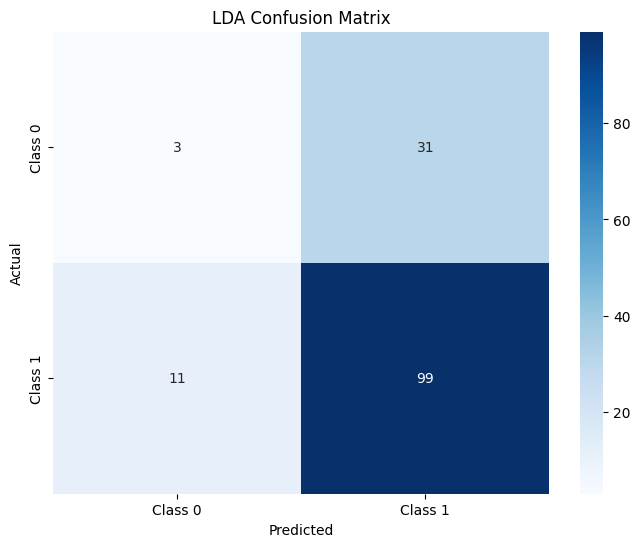

True Positive Rate (TPR): 0.9000
True Negative Rate (TNR): 0.0882
False Positive Rate (FPR): 0.9118
False Negative Rate (FNR): 0.1000


In [206]:
# Initialize LDA
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train_scaled, y_train)

# Predictions
y_pred = lda.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LDA Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Accuracy: 0.7638888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.15      0.23        34
           1       0.78      0.95      0.86       110

    accuracy                           0.76       144
   macro avg       0.64      0.55      0.54       144
weighted avg       0.72      0.76      0.71       144



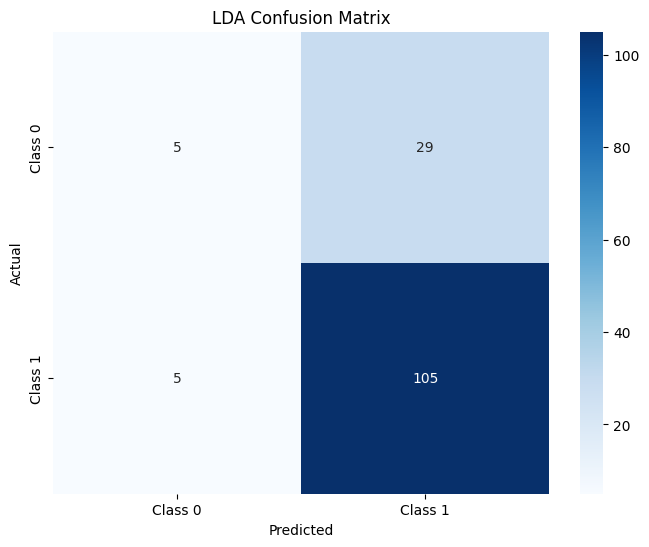

True Positive Rate (TPR): 0.9545
True Negative Rate (TNR): 0.1471
False Positive Rate (FPR): 0.8529
False Negative Rate (FNR): 0.0455


In [207]:
# Initialize LDA
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train_selected, y_train)

# Predictions
y_pred = lda.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LDA Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Accuracy: 0.7361111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.15      0.21        34
           1       0.78      0.92      0.84       110

    accuracy                           0.74       144
   macro avg       0.57      0.53      0.53       144
weighted avg       0.68      0.74      0.69       144



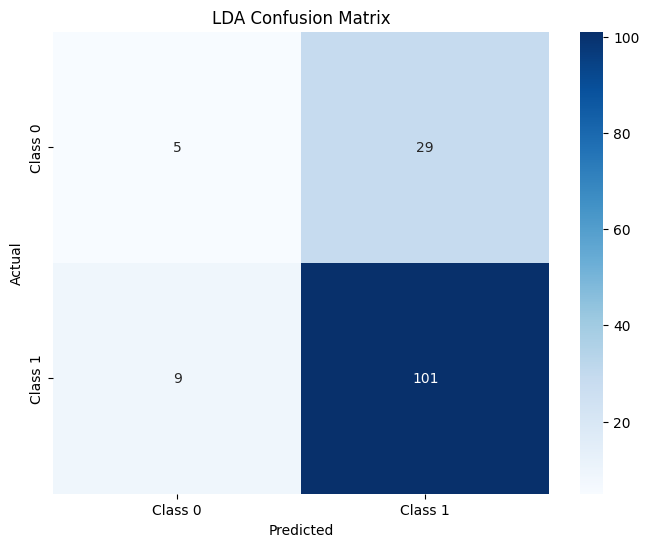

True Positive Rate (TPR): 0.9182
True Negative Rate (TNR): 0.1471
False Positive Rate (FPR): 0.8529
False Negative Rate (FNR): 0.0818


In [208]:
# Initialize LDA
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train_selected_reg, y_train)

# Predictions
y_pred = lda.predict(X_test_selected_reg)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LDA Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Neural Network

Epoch 1/5
46/46 [==============================] - 2s 15ms/step - loss: 0.6388 - accuracy: 0.6980 - val_loss: 0.5566 - val_accuracy: 0.7565
Epoch 2/5
46/46 [==============================] - 0s 7ms/step - loss: 0.5503 - accuracy: 0.7505 - val_loss: 0.5512 - val_accuracy: 0.7652
Epoch 3/5
46/46 [==============================] - 0s 7ms/step - loss: 0.4986 - accuracy: 0.7637 - val_loss: 0.5468 - val_accuracy: 0.7652
Epoch 4/5
46/46 [==============================] - 0s 7ms/step - loss: 0.4609 - accuracy: 0.7834 - val_loss: 0.5779 - val_accuracy: 0.7043
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
Accuracy: 0.7013888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.15      0.19        34
           1       0.77      0.87      0.82       110

    accuracy                           0.70       144
   macro avg       0.52      0.51      0.50       144
weighted avg       0.65      0.70      0.67       144



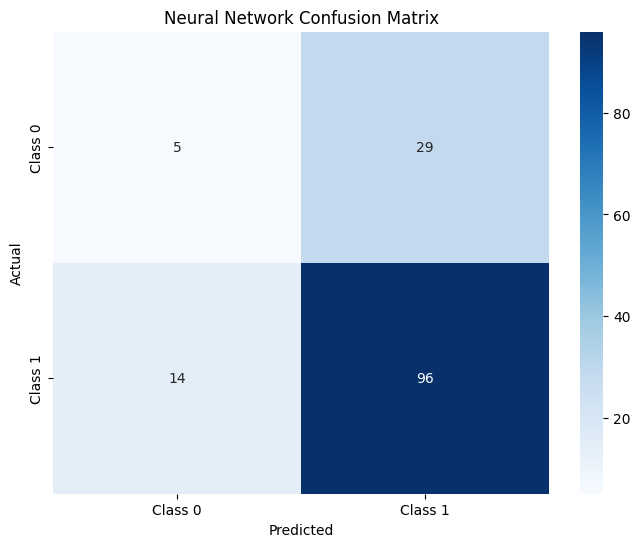

True Positive Rate (TPR): 0.8727
True Negative Rate (TNR): 0.1471
False Positive Rate (FPR): 0.8529
False Negative Rate (FNR): 0.1273


In [209]:
# Encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Initialize neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=5, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Epoch 1/5
46/46 [==============================] - 1s 9ms/step - loss: 0.6337 - accuracy: 0.6630 - val_loss: 0.5094 - val_accuracy: 0.7913
Epoch 2/5
46/46 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7265 - val_loss: 0.5168 - val_accuracy: 0.7826
Epoch 3/5
46/46 [==============================] - 1s 18ms/step - loss: 0.5093 - accuracy: 0.7527 - val_loss: 0.5174 - val_accuracy: 0.7739
Epoch 4/5
46/46 [==============================] - 0s 4ms/step - loss: 0.4710 - accuracy: 0.7768 - val_loss: 0.5439 - val_accuracy: 0.7304
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
Accuracy: 0.7083333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.15      0.19        34
           1       0.77      0.88      0.82       110

    accuracy                           0.71       144
   macro avg       0.52      0.51      0.51       144
weighted avg       0.65      0.71      0.67       144



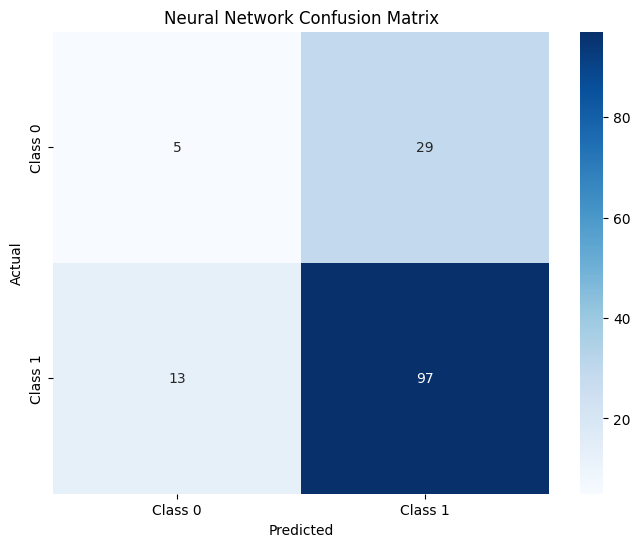

True Positive Rate (TPR): 0.8818
True Negative Rate (TNR): 0.1471
False Positive Rate (FPR): 0.8529
False Negative Rate (FNR): 0.1182


In [210]:
# Encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Initialize neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Third hidden layer
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=5, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Epoch 1/5
46/46 [==============================] - 1s 8ms/step - loss: 0.6672 - accuracy: 0.5777 - val_loss: 0.5273 - val_accuracy: 0.7913
Epoch 2/5
46/46 [==============================] - 0s 5ms/step - loss: 0.5729 - accuracy: 0.7287 - val_loss: 0.5012 - val_accuracy: 0.7826
Epoch 3/5
46/46 [==============================] - 0s 4ms/step - loss: 0.5622 - accuracy: 0.7243 - val_loss: 0.4920 - val_accuracy: 0.7652
Epoch 4/5
46/46 [==============================] - 0s 4ms/step - loss: 0.5592 - accuracy: 0.7309 - val_loss: 0.4965 - val_accuracy: 0.7652
Epoch 5/5
5/5 [==============================] - 0s 3ms/step
Accuracy: 0.7708333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.18      0.27        34
           1       0.79      0.95      0.86       110

    accuracy                           0.77       144
   macro avg       0.67      0.57      0.57       144
weighted avg       0.73      0.77      0.72       144



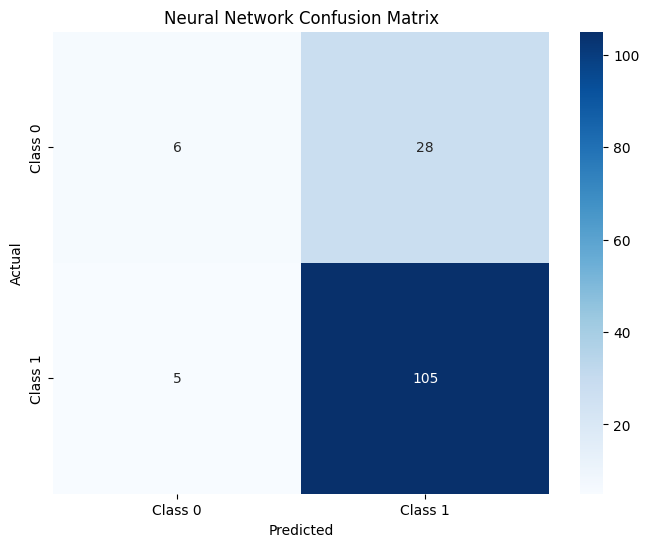

True Positive Rate (TPR): 0.9545
True Negative Rate (TNR): 0.1765
False Positive Rate (FPR): 0.8235
False Negative Rate (FNR): 0.0455


In [211]:
# Encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Initialize neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train_selected.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_selected, y_train_encoded, epochs=5, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred_prob = model.predict(X_test_selected)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Epoch 1/5
46/46 [==============================] - 4s 25ms/step - loss: 0.6458 - accuracy: 0.6871 - val_loss: 0.5644 - val_accuracy: 0.7913
Epoch 2/5
46/46 [==============================] - 1s 19ms/step - loss: 0.5744 - accuracy: 0.7243 - val_loss: 0.5089 - val_accuracy: 0.7652
Epoch 3/5
46/46 [==============================] - 1s 16ms/step - loss: 0.5573 - accuracy: 0.7287 - val_loss: 0.5002 - val_accuracy: 0.7739
Epoch 4/5
46/46 [==============================] - 1s 13ms/step - loss: 0.5569 - accuracy: 0.7309 - val_loss: 0.4985 - val_accuracy: 0.7565
Epoch 5/5
5/5 [==============================] - 0s 7ms/step
Accuracy: 0.7708333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.09      0.15        34
           1       0.78      0.98      0.87       110

    accuracy                           0.77       144
   macro avg       0.69      0.54      0.51       144
weighted avg       0.74      0.77      0.70       144



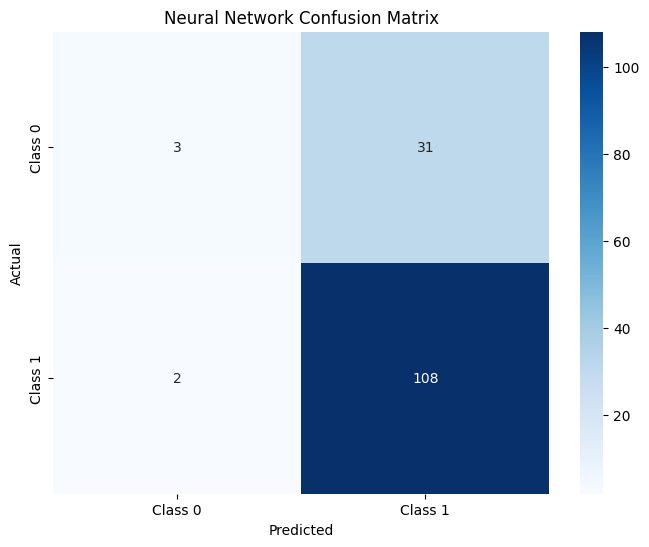

True Positive Rate (TPR): 0.9818
True Negative Rate (TNR): 0.0882
False Positive Rate (FPR): 0.9118
False Negative Rate (FNR): 0.0182


In [212]:
# Encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Initialize neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train_selected.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Third hidden layer
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_selected, y_train_encoded, epochs=5, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred_prob = model.predict(X_test_selected)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Epoch 1/5
46/46 [==============================] - 2s 15ms/step - loss: 0.6092 - accuracy: 0.6893 - val_loss: 0.4859 - val_accuracy: 0.7913
Epoch 2/5
46/46 [==============================] - 0s 6ms/step - loss: 0.5336 - accuracy: 0.7462 - val_loss: 0.4904 - val_accuracy: 0.7739
Epoch 3/5
46/46 [==============================] - 1s 17ms/step - loss: 0.5156 - accuracy: 0.7571 - val_loss: 0.4929 - val_accuracy: 0.7826
Epoch 4/5
46/46 [==============================] - 1s 17ms/step - loss: 0.5031 - accuracy: 0.7593 - val_loss: 0.5124 - val_accuracy: 0.7652
Epoch 5/5
5/5 [==============================] - 0s 6ms/step
Accuracy: 0.7152777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.09      0.13        34
           1       0.76      0.91      0.83       110

    accuracy                           0.72       144
   macro avg       0.50      0.50      0.48       144
weighted avg       0.64      0.72      0.66       144



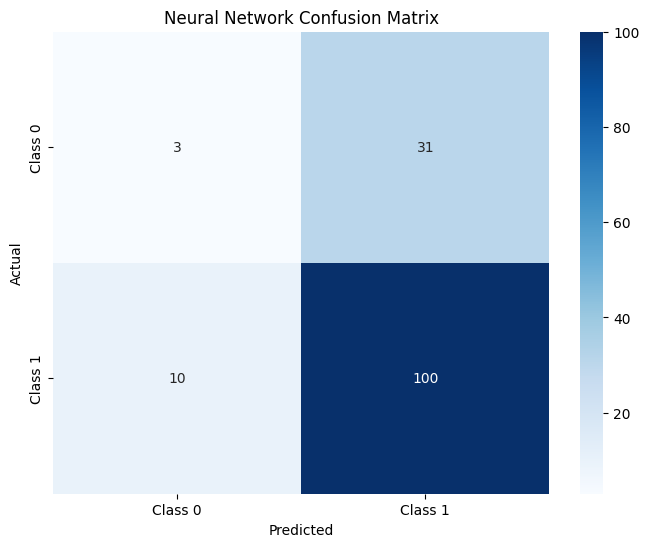

True Positive Rate (TPR): 0.9091
True Negative Rate (TNR): 0.0882
False Positive Rate (FPR): 0.9118
False Negative Rate (FNR): 0.0909


In [213]:
# Encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Initialize neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train_selected_reg.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_selected_reg, y_train_encoded, epochs=5, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred_prob = model.predict(X_test_selected_reg)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Epoch 1/5
46/46 [==============================] - 2s 15ms/step - loss: 0.5881 - accuracy: 0.7287 - val_loss: 0.4957 - val_accuracy: 0.7913
Epoch 2/5
46/46 [==============================] - 0s 7ms/step - loss: 0.5364 - accuracy: 0.7396 - val_loss: 0.4808 - val_accuracy: 0.7913
Epoch 3/5
46/46 [==============================] - 0s 7ms/step - loss: 0.5124 - accuracy: 0.7549 - val_loss: 0.4837 - val_accuracy: 0.7565
Epoch 4/5
46/46 [==============================] - 0s 9ms/step - loss: 0.4970 - accuracy: 0.7571 - val_loss: 0.4925 - val_accuracy: 0.7739
Epoch 5/5
5/5 [==============================] - 0s 16ms/step
Accuracy: 0.7361111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.12      0.17        34
           1       0.77      0.93      0.84       110

    accuracy                           0.74       144
   macro avg       0.55      0.52      0.51       144
weighted avg       0.67      0.74      0.69       144



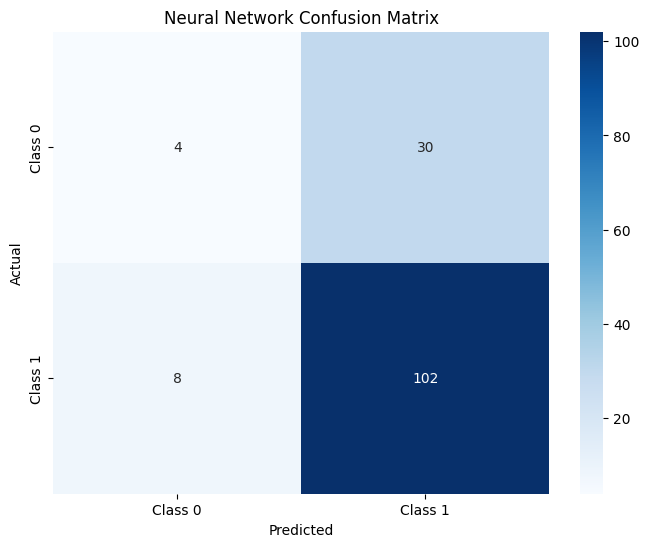

True Positive Rate (TPR): 0.9273
True Negative Rate (TNR): 0.1176
False Positive Rate (FPR): 0.8824
False Negative Rate (FNR): 0.0727


In [214]:
# Encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Initialize neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train_selected_reg.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Third hidden layer
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_selected_reg, y_train_encoded, epochs=5, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred_prob = model.predict(X_test_selected_reg)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Random Forest Classifier

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.76      0.98      0.86       110

    accuracy                           0.75       144
   macro avg       0.38      0.49      0.43       144
weighted avg       0.58      0.75      0.65       144



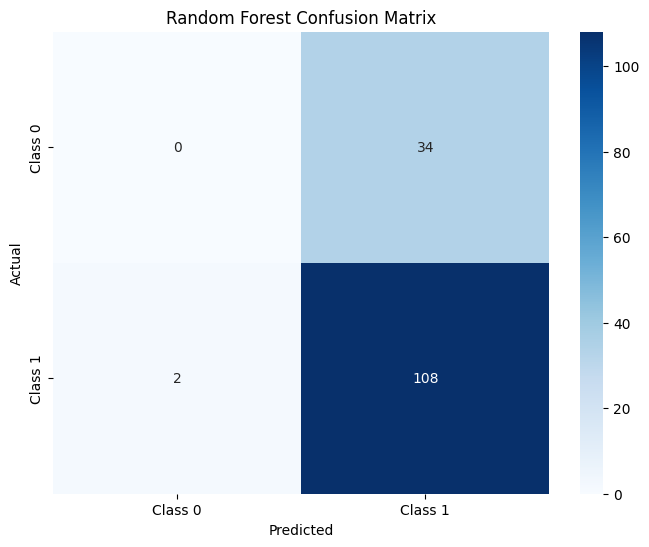

True Positive Rate (TPR): 0.9818
True Negative Rate (TNR): 0.0000
False Positive Rate (FPR): 1.0000
False Negative Rate (FNR): 0.0182


In [215]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Accuracy: 0.7361111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.18      0.24        34
           1       0.78      0.91      0.84       110

    accuracy                           0.74       144
   macro avg       0.58      0.54      0.54       144
weighted avg       0.69      0.74      0.70       144



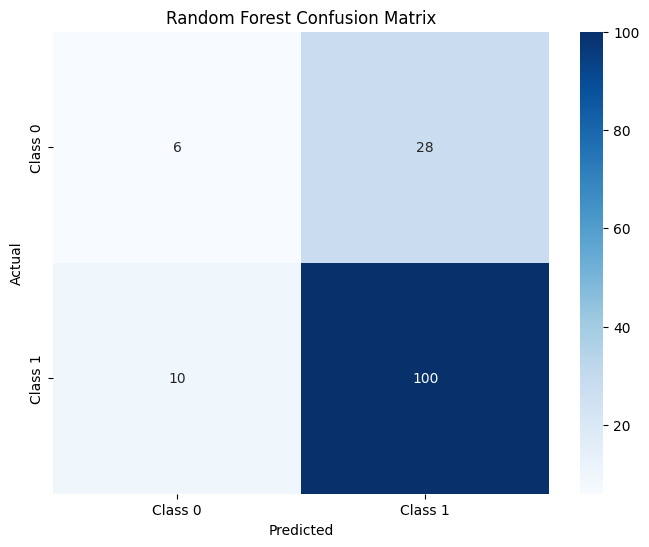

True Positive Rate (TPR): 0.9091
True Negative Rate (TNR): 0.1765
False Positive Rate (FPR): 0.8235
False Negative Rate (FNR): 0.0909


In [216]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_selected, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Accuracy: 0.7083333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.18      0.22        34
           1       0.77      0.87      0.82       110

    accuracy                           0.71       144
   macro avg       0.54      0.52      0.52       144
weighted avg       0.66      0.71      0.68       144



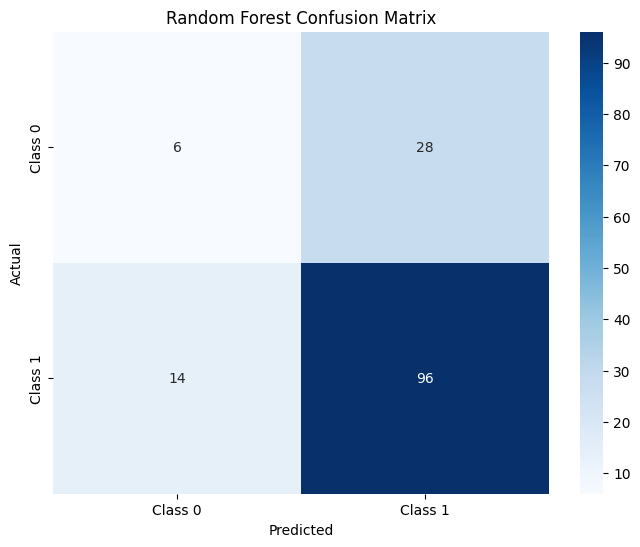

True Positive Rate (TPR): 0.8727
True Negative Rate (TNR): 0.1765
False Positive Rate (FPR): 0.8235
False Negative Rate (FNR): 0.1273


In [217]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_selected_reg, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_selected_reg)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

KNN

In [218]:
# Convert categorical columns to one-hot encoding
one_hot_categorical_columns = [
    'Primary_streaming_service', 'Fav_genre',
    'Frequency_Classical', 'Frequency_Country', 'Frequency_EDM',
    'Frequency_Folk', 'Frequency_Gospel', 'Frequency_Hip_hop',
    'Frequency_Jazz', 'Frequency_K_pop', 'Frequency_Latin',
    'Frequency_Lofi', 'Frequency_Metal', 'Frequency_Pop', 'Frequency_R_B',
    'Frequency_Rap', 'Frequency_Rock', 'Frequency_Video_game_music'
]

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=one_hot_categorical_columns)

In [219]:
# Display all the columns
print(data_encoded.columns)

Index(['Age', 'Hours_per_day', 'While_working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign_languages', 'BPM', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Music_effects', 'Music_effects_Improve',
       'Primary_streaming_service_Apple Music',
       'Primary_streaming_service_I do not use a streaming service.',
       'Primary_streaming_service_Other streaming service',
       'Primary_streaming_service_Pandora',
       'Primary_streaming_service_Spotify',
       'Primary_streaming_service_YouTube Music', 'Fav_genre_Classical',
       'Fav_genre_Country', 'Fav_genre_EDM', 'Fav_genre_Folk',
       'Fav_genre_Gospel', 'Fav_genre_Hip hop', 'Fav_genre_Jazz',
       'Fav_genre_K pop', 'Fav_genre_Latin', 'Fav_genre_Lofi',
       'Fav_genre_Metal', 'Fav_genre_Pop', 'Fav_genre_R&B', 'Fav_genre_Rap',
       'Fav_genre_Rock', 'Fav_genre_Video game music',
       'Frequency_Classical_Never', 'Frequency_Classical_Rarely',
       'Frequency_Classical_Sometimes', 'Frequenc

In [220]:
# Drop the 'Music_effects' column
data_encoded.drop(columns=['Music_effects'], inplace=True)

In [221]:
# Define features and target
X = data_encoded.drop(columns=['Music_effects_Improve'])
y = data_encoded['Music_effects_Improve']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best k: 17
Accuracy for best k: 0.7777777777777778


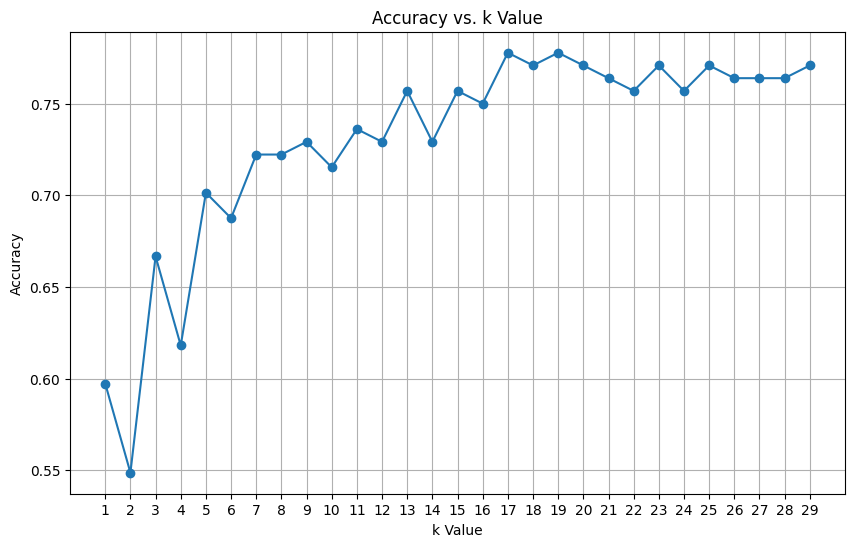

In [222]:
# Define a range of k values to evaluate
k_values = range(1, 30)
accuracies = []

# Loop through different values of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Find the best k
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k:", best_k)
print("Accuracy for best k:", max(accuracies))

# Plot the graph of prediction accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

K Nearest Neighbors:
Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.75      0.09      0.16        34
           1       0.78      0.99      0.87       110

    accuracy                           0.78       144
   macro avg       0.76      0.54      0.51       144
weighted avg       0.77      0.78      0.70       144



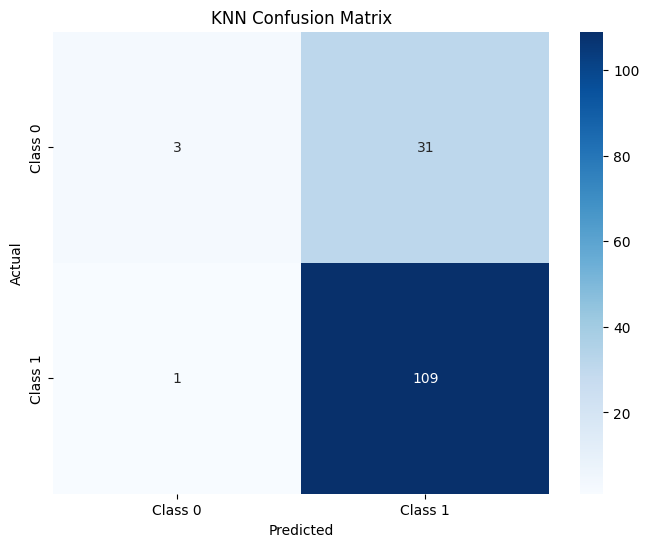

True Positive Rate (TPR): 0.9909
True Negative Rate (TNR): 0.0882
False Positive Rate (FPR): 0.9118
False Negative Rate (FNR): 0.0091


In [223]:
# KNN with k value best_k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

print("K Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Random Forest

Accuracy: 0.7430555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.76      0.97      0.85       110

    accuracy                           0.74       144
   macro avg       0.38      0.49      0.43       144
weighted avg       0.58      0.74      0.65       144



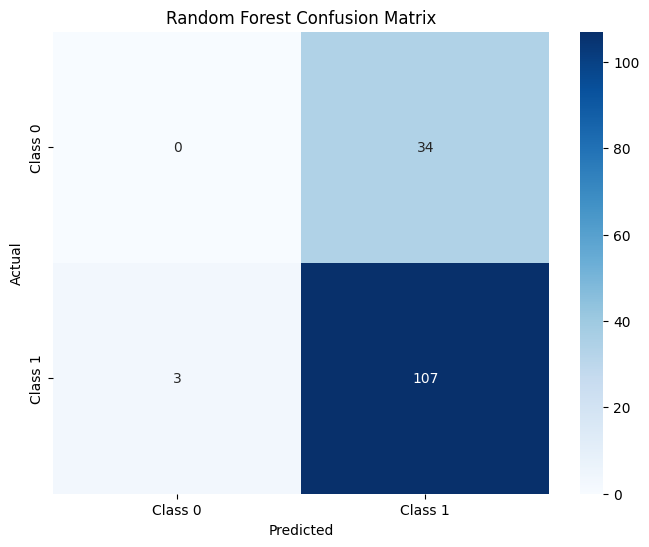

True Positive Rate (TPR): 0.9727
True Negative Rate (TNR): 0.0000
False Positive Rate (FPR): 1.0000
False Negative Rate (FNR): 0.0273


In [224]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Support Vector Classifier

Accuracy: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.18      0.23        34
           1       0.78      0.89      0.83       110

    accuracy                           0.72       144
   macro avg       0.56      0.53      0.53       144
weighted avg       0.67      0.72      0.69       144



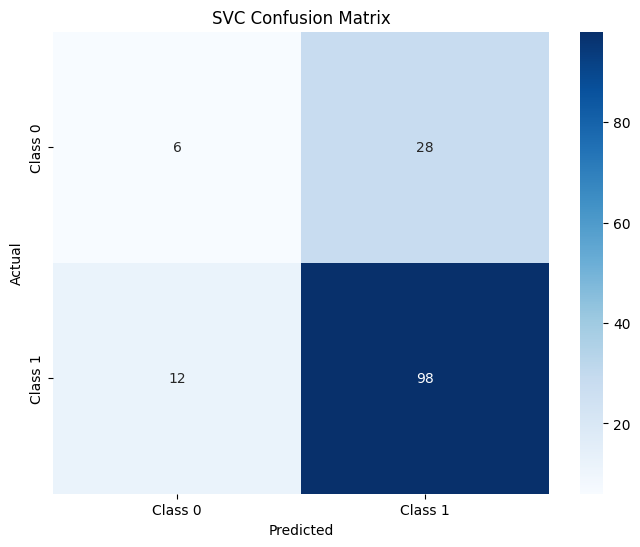

True Positive Rate (TPR): 0.8909
True Negative Rate (TNR): 0.1765
False Positive Rate (FPR): 0.8235
False Negative Rate (FNR): 0.1091


In [225]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.76      0.98      0.86       110

    accuracy                           0.75       144
   macro avg       0.38      0.49      0.43       144
weighted avg       0.58      0.75      0.65       144



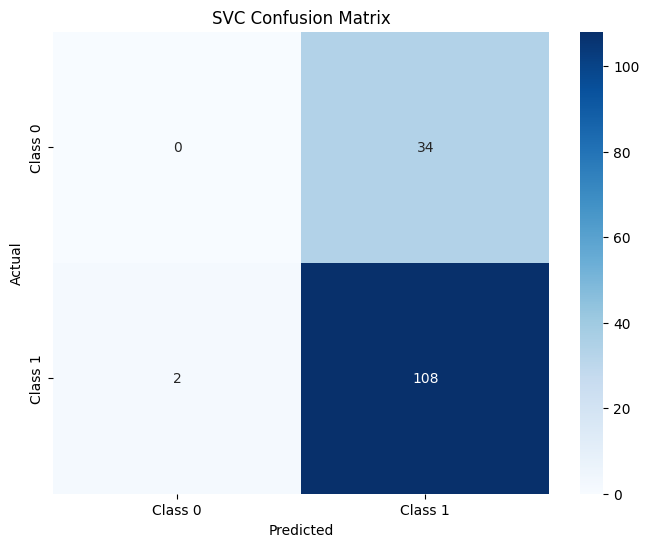

True Positive Rate (TPR): 0.9818
True Negative Rate (TNR): 0.0000
False Positive Rate (FPR): 1.0000
False Negative Rate (FNR): 0.0182


In [226]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='poly', random_state=42)

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

Accuracy: 0.7569444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.76      0.99      0.86       110

    accuracy                           0.76       144
   macro avg       0.38      0.50      0.43       144
weighted avg       0.58      0.76      0.66       144



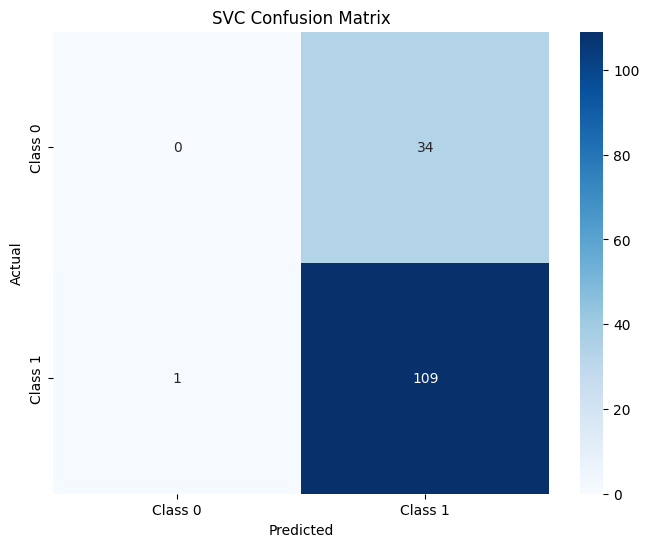

True Positive Rate (TPR): 0.9909
True Negative Rate (TNR): 0.0000
False Positive Rate (FPR): 1.0000
False Negative Rate (FNR): 0.0091


In [227]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate the rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate (Fall-out or Probability of False Alarm)
fnr = fn / (fn + tp)  # False Negative Rate (Miss Rate)

# Print the rates
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")